In [2]:
import numpy as np
import pandas as pd

In [3]:
!pip install nibabel

In [4]:
!pip install opencv-python

In [ ]:
import os
import numpy as np
import nibabel as nib
import cv2
import random
import h5py
from tqdm import tqdm
from sklearn.utils import resample

# Define directories
BRATS_DIR = "C:/Users/mohan/OneDrive/Desktop/laafat/inveep-MEDICIMAGE/BraTS2020_training_data/content/data"
FIGSHARE_DIR = "C:/Users/mohan/OneDrive/Desktop/laafat/inveep-MEDICIMAGE/archive (1)/dataset/data"
SAVE_DIR = "C:/Users/mohan/OneDrive/Desktop/laafat/inveep-MEDICIMAGE/preprocess_data"

# Create save directory if it does not exist
os.makedirs(SAVE_DIR, exist_ok=True)

# Define target image size
IMG_SIZE = (256, 256)

def preprocess_image(img):
    """Resize and normalize MRI image"""
    img = cv2.resize(img, IMG_SIZE, interpolation=cv2.INTER_CUBIC)
    img = (img - np.min(img)) / (np.max(img) - np.min(img) + 1e-8)  # Normalize to [0,1]
    return img

# Load Figshare images (MAT files)
def load_figshare_images():
    """Load MRI images from Figshare dataset stored in .mat files."""
    figshare_images = []
    for file in tqdm(os.listdir(FIGSHARE_DIR)):
        if file.endswith(".mat"):  # Only process .mat files
            file_path = os.path.join(FIGSHARE_DIR, file)
            try:
                with h5py.File(file_path, "r") as f:
                    # Extract image data from cjdata/image
                    if "cjdata" in f and "image" in f["cjdata"]:
                        img = np.array(f["cjdata/image"])  # Read image data
                        img = np.transpose(img)  # Transpose to match expected dimensions
                        img = preprocess_image(img)  # Resize and normalize
                        figshare_images.append(img)
            except Exception as e:
                print(f"Error loading {file}: {e}")
    return figshare_images
# Load BraTS images (HDF5 files)
def load_brats_images():
    """Load MRI images from BraTS dataset stored in .h5 files."""
    brats_images = []
    for file in tqdm(os.listdir(BRATS_DIR)):
        if file.endswith(".h5"):
            file_path = os.path.join(BRATS_DIR, file)
            try:
                with h5py.File(file_path, "r") as f:
                    img = np.array(f["image"])  # Extract MRI image (240, 240, 4)
                    img = img[:, :, 0]  # Select one modality (e.g., first channel)
                    img = preprocess_image(img)
                    brats_images.append(img)
            except Exception as e:
                print(f"Error loading {file}: {e}")
    return brats_images

# Load datasets
brats_images = load_brats_images()
figshare_images = load_figshare_images()
print(f"Length of brats_images: {len(brats_images)}")
print(f"Length of figshare_images: {len(figshare_images)}")

# Balance dataset by upsampling minority class
def balance_dataset(brats, figshare):
    """Handle class imbalance by upsampling the smaller dataset."""
    min_size = min(len(brats), len(figshare))
    if min_size == 0:
        raise ValueError("One of the datasets is empty. Cannot balance datasets.")
    
    brats_balanced = resample(brats, replace=True, n_samples=min_size, random_state=42)
    figshare_balanced = resample(figshare, replace=True, n_samples=min_size, random_state=42)
    
    return brats_balanced, figshare_balanced

brats_balanced, figshare_balanced = balance_dataset(brats_images, figshare_images)

# Convert to numpy arrays
X_brats = np.array(brats_balanced)
X_figshare = np.array(figshare_balanced)

# Save preprocessed data
np.save(os.path.join(SAVE_DIR, "brats_preprocessed.npy"), X_brats)
np.save(os.path.join(SAVE_DIR, "figshare_preprocessed.npy"), X_figshare)

print("Preprocessing complete. Data saved!")


100%|██████████| 3064/3064 [00:36<00:00, 82.95it/s]


Length of brats_images: 57195
Length of figshare_images: 3064
Preprocessing complete. Data saved!


In [64]:
!pip install tensorflow

^C


C:\Users\MSI\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.5312 - loss: 0.7852 - val_accuracy: 0.7941 - val_loss: 0.5711
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.6595 - loss: 0.6091 - val_accuracy: 0.9215 - val_loss: 0.4587
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.8121 - loss: 0.5042 - val_accuracy: 0.9164 - val_loss: 0.3788
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.8625 - loss: 0.4345 - val_accuracy: 0.9337 - val_loss: 0.3287
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.8752 - loss: 0.3880 - val_accuracy: 0.9368 - val_loss: 0.2875
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.8806 - loss: 0.3513 - val_accuracy: 0.9134 - val_loss: 0.2870
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.8931 - loss: 0.3298 - val_accuracy: 0.9439 - val_loss: 0.2294
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.8983 - loss: 0.3003 - val_accu

Test Accuracy: 0.9608


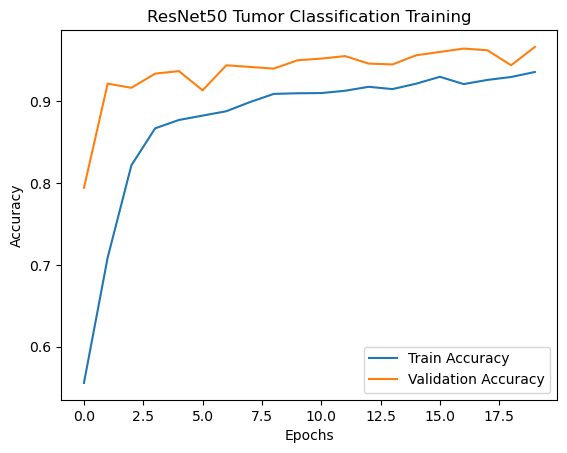

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Define paths to preprocessed data
DATA_DIR = "C:/Users/mohan/OneDrive/Desktop/laafat/inveep-MEDICIMAGE/preprocess_data"

# Load preprocessed data
brats_data = np.load(os.path.join(DATA_DIR, "brats_preprocessed.npy"))
figshare_data = np.load(os.path.join(DATA_DIR, "figshare_preprocessed.npy"))

# Assign labels: 1 for Tumor (BraTS), 0 for No Tumor (Figshare)
y_brats = np.ones(len(brats_data))  # Tumor
Y_figshare = np.zeros(len(figshare_data))  # No Tumor

# Combine data & labels
X = np.concatenate((brats_data, figshare_data), axis=0)
y = np.concatenate((y_brats, Y_figshare), axis=0)

# Shuffle data
X, y = shuffle(X, y, random_state=42)

# Split into Train, Validation & Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Expand dimensions (ResNet50 requires 3 channels)
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = np.repeat(X_train, 3, axis=-1)
X_val = np.repeat(X_val, 3, axis=-1)
X_test = np.repeat(X_test, 3, axis=-1)

# Image augmentation
train_datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

# Load ResNet50 model (pretrained on ImageNet)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze layers for feature extraction

# Add classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Compile model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=20,
                    verbose=1)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.4f}")

# Save model
model.save(os.path.join(DATA_DIR, "resnet50_tumor_classifier.h5"))

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ResNet50 Tumor Classification Training')
plt.show()


100%|██████████| 3064/3064 [00:14<00:00, 218.10it/s]


Loaded 3064 tumor images with labels.
Balanced class counts: [1426 1426 1426]


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 64, 64,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 64, 64,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 64, 64,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 64, 64,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 64, 64,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 64, 64,    │     12,288 │ conv2_block2_0_r

 Total params: 7,300,675 (27.85 MB)

 Trainable params: 263,171 (1.00 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.4424 - loss: 1.2089 - val_accuracy: 0.7523 - val_loss: 0.6813
Epoch 2/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.6965 - loss: 0.7045 - val_accuracy: 0.8154 - val_loss: 0.5284
Epoch 3/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.7891 - loss: 0.5629 - val_accuracy: 0.8329 - val_loss: 0.4779
Epoch 4/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.8042 - loss: 0.4894 - val_accuracy: 0.8400 - val_loss: 0.4556
Epoch 5/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.8462 - loss: 0.4407 - val_accuracy: 0.8259 - val_loss: 0.4669
Epoch 6/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8555 - loss: 0.3996 - val_accuracy: 0.8458 - val_loss: 0.4126
Epoch 7/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8602 - loss: 0.3865 - val_accuracy: 0.8575 - val_loss: 0.3755
Epoch 8/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8692 - loss: 0.3766 - val_accuracy: 0.8563 - v


Test Accuracy: 0.8949


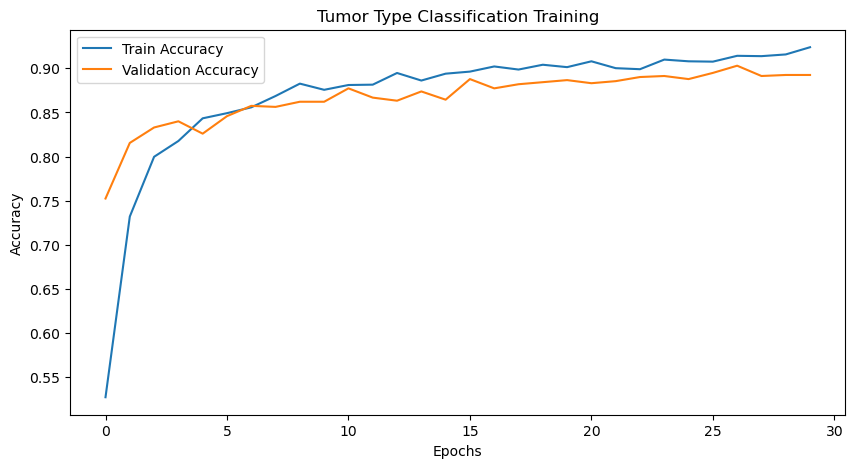

In [ ]:
import os
import numpy as np
import h5py
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define directories
FIGSHARE_DIR = "C:/Users/MSI/Downloads/archive (23)/dataset/data"  # Update path
SAVE_DIR = "C:/Users/MSI/Downloads/tumor_classification_models"    # Directory to save model

# Create save directory
os.makedirs(SAVE_DIR, exist_ok=True)

# Preprocess function (resize + normalize)
def preprocess_image(img):
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_CUBIC)
    img = (img - np.min(img)) / (np.max(img) - np.min(img) + 1e-8)
    return img

# Load Figshare tumor data with labels
def load_figshare_tumor_data():
    images = []
    labels = []
    for file in tqdm(os.listdir(FIGSHARE_DIR)):
        if file.endswith(".mat"):
            file_path = os.path.join(FIGSHARE_DIR, file)
            try:
                with h5py.File(file_path, 'r') as f:
                    cjdata = f['cjdata']
                    img = np.array(cjdata['image']).T
                    label = int(np.array(cjdata['label']).item())  # Ensure integer label
                    
                    # Labels: 1=Glioma, 2=Meningioma, 3=Pituitary (now 0,1,2)
                    if label in [1, 2, 3]:
                        img = preprocess_image(img)
                        images.append(img)
                        labels.append(label - 1)  # Now integer (0,1,2)
            except Exception as e:
                print(f"Skipped {file}: {e}")
    return np.array(images), np.array(labels, dtype=np.int64)  # Explicitly cast to int

# Load tumor data and labels
X, y = load_figshare_tumor_data()
print(f"Loaded {len(X)} tumor images with labels.")

# Balance classes (upsample minority classes)
def balance_classes(X, y):
    class_counts = np.bincount(y)
    max_count = max(class_counts)
    X_balanced, y_balanced = [], []
    
    for class_idx in range(3):
        X_class = X[y == class_idx]
        y_class = y[y == class_idx]
        # Upsample to match max_count
        X_upsampled = resample(X_class, replace=True, n_samples=max_count, random_state=42)
        y_upsampled = np.full(max_count, class_idx, dtype=np.int64)  # Ensure integer dtype
        X_balanced.extend(X_upsampled)
        y_balanced.extend(y_upsampled)
    
    return np.array(X_balanced), np.array(y_balanced)
X_balanced, y_balanced = balance_classes(X, y)
print(f"Balanced class counts: {np.bincount(y_balanced)}")

# Convert labels to one-hot encoding
y_onehot = to_categorical(y_balanced, num_classes=3)

# Split into train, validation, test
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_onehot, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42  # 0.25 * 0.8 = 0.2 val
)

# Convert grayscale to 3 channels (for DenseNet/ViT)
def expand_channels(images):
    images = np.expand_dims(images, axis=-1)  # Add channel dim
    return np.repeat(images, 3, axis=-1)      # Repeat for RGB

X_train = expand_channels(X_train)
X_val = expand_channels(X_val)
X_test = expand_channels(X_test)

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Build DenseNet121 model
def build_model():
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    # Freeze base layers
    base_model.trainable = False
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(3, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=outputs)
    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_model()
model.summary()

# Train the model
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(X_val, y_val),
    verbose=1
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Save the model
model.save(os.path.join(SAVE_DIR, "tumor_type_classifier_densenet.h5"))

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Tumor Type Classification Training')
plt.show()

In [7]:
import os
import random
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import cv2
import nibabel as nib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_dir = "C:/Users/mohan/OneDrive/Desktop/laafat/inveep-MEDICIMAGE/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"
val_dir = "C:/Users/mohan/OneDrive/Desktop/laafat/inveep-MEDICIMAGE/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData"


In [3]:
class BraTSDataset(Dataset):
    def __init__(self, patient_list, data_dir, is_train=True, transform=None, slice_range=(60, 100)):
        self.data_dir = data_dir
        self.is_train = is_train
        self.transform = transform
        self.modalities = ["flair", "t1", "t1ce", "t2"]
        self.patients = [p for p in patient_list if not p.endswith(".csv")]
        self.slice_range = slice_range  # Only load a range of slices to save memory
        
    def load_nifti(self, path):
        nifti_img = nib.load(path)
        return np.array(nifti_img.get_fdata(), dtype=np.float32)
    
    def __len__(self):
        return len(self.patients)
    
    def __getitem__(self, idx):
        patient_id = self.patients[idx]
        patient_path = os.path.join(self.data_dir, patient_id)
        
        # Load 4 MR modalities
        images = []
        for modality in self.modalities:
            img_path = os.path.join(patient_path, f"{patient_id}_{modality}.nii")
            img = self.load_nifti(img_path)
            
            # Only keep the central axial slices where tumor is most likely to be visible
            start_slice, end_slice = self.slice_range
            img = img[:, :, start_slice:end_slice]
            
            # Z-score normalization for better stability
            if np.std(img) > 0:
                img = (img - np.mean(img)) / np.std(img)
            else:
                img = np.zeros_like(img)
            
            images.append(img)
            
        # Stack images as channels
        images = np.stack(images, axis=0)  # (4, H, W, D_reduced)
        
        # To PyTorch Tensor
        images = torch.tensor(images, dtype=torch.float32)
        
        # If it is a train_set load segmentation mask too
        if self.is_train:
            # Try multiple possible segmentation file names
            seg_paths = [
                os.path.join(patient_path, f"{patient_id}_seg.nii"),
                os.path.join(patient_path, f"{patient_id}_Segm.nii"),
                os.path.join(patient_path, f"{patient_id}_Segmentation.nii")
            ]
            
            # Find the first existing segmentation file
            seg_path = next((path for path in seg_paths if os.path.exists(path)), None)
            
            if seg_path is None:
                raise FileNotFoundError(f"No segmentation file found for patient {patient_id}")
            
            mask = self.load_nifti(seg_path)
            
            # Get the same slice range
            mask = mask[:, :, self.slice_range[0]:self.slice_range[1]]
            
            # Convert to binary mask
            mask = (mask > 0).astype(np.float32)
            mask = torch.tensor(mask, dtype=torch.long)
        else:
            mask = None
                
        return (images, mask) if self.is_train else images

# Optimize memory by selecting a subset of patients for quick testing
def get_subset_patients(patient_list, ratio=0.3):
    """Get a subset of patients for memory-efficient training"""
    n_patients = max(2, int(len(patient_list) * ratio))
    return random.sample(patient_list, n_patients)

In [ ]:
train_dir = "C:/Users/mohan/OneDrive/Desktop/laafat/inveep-MEDICIMAGE/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"
val_dir = "C:/Users/mohan/OneDrive/Desktop/laafat/inveep-MEDICIMAGE/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData"

class BraTSDataset(Dataset):
    def __init__(self, patient_list, data_dir, is_train=True, transform=None, slice_range=(60, 100)):
        self.data_dir = data_dir
        self.is_train = is_train
        self.transform = transform
        self.modalities = ["flair", "t1", "t1ce", "t2"]
        self.patients = [p for p in patient_list if not p.endswith(".csv")]
        self.slice_range = slice_range  # Only load a range of slices to save memory
        
    def load_nifti(self, path):
        nifti_img = nib.load(path)
        return np.array(nifti_img.get_fdata(), dtype=np.float32)
    
    def __len__(self):
        return len(self.patients)
    
    def __getitem__(self, idx):
        patient_id = self.patients[idx]
        patient_path = os.path.join(self.data_dir, patient_id)
        
        # Load 4 MR modalities
        images = []
        for modality in self.modalities:
            img_path = os.path.join(patient_path, f"{patient_id}_{modality}.nii")
            img = self.load_nifti(img_path)
            
            # Only keep the central axial slices where tumor is most likely to be visible
            start_slice, end_slice = self.slice_range
            img = img[:, :, start_slice:end_slice]
            
            # Z-score normalization for better stability
            if np.std(img) > 0:
                img = (img - np.mean(img)) / np.std(img)
            else:
                img = np.zeros_like(img)
            
            images.append(img)
            
        # Stack images as channels
        images = np.stack(images, axis=0)  # (4, H, W, D_reduced)
        
        # To PyTorch Tensor
        images = torch.tensor(images, dtype=torch.float32)
        
        # If it is a train_set load segmentation mask too
        if self.is_train:
            # Try multiple possible segmentation file names
            seg_paths = [
                os.path.join(patient_path, f"{patient_id}_seg.nii"),
                os.path.join(patient_path, f"{patient_id}_Segm.nii"),
                os.path.join(patient_path, f"{patient_id}_Segmentation.nii")
            ]
            
            # Find the first existing segmentation file
            seg_path = next((path for path in seg_paths if os.path.exists(path)), None)
            
            if seg_path is None:
                raise FileNotFoundError(f"No segmentation file found for patient {patient_id}")
            
            mask = self.load_nifti(seg_path)
            
            # Get the same slice range
            mask = mask[:, :, self.slice_range[0]:self.slice_range[1]]
            
            # Convert to binary mask
            mask = (mask > 0).astype(np.float32)
            mask = torch.tensor(mask, dtype=torch.long)
        else:
            mask = None
                
        return (images, mask) if self.is_train else images

# Optimize memory by selecting a subset of patients for quick testing
def get_subset_patients(patient_list, ratio=0.3):
    """Get a subset of patients for memory-efficient training"""
    n_patients = max(2, int(len(patient_list) * ratio))
    return random.sample(patient_list, n_patients)

# Directories for training and validation data

# Get patient directories
all_train_patients = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])
all_test_patients = sorted([d for d in os.listdir(val_dir) if os.path.isdir(os.path.join(val_dir, d))])

# Use subset for quick testing
use_subset = True  # Change to False for full dataset
if use_subset:
    def get_subset_patients(patients, ratio=0.2):
        return patients[:max(1, int(len(patients) * ratio))]
    
    all_train_patients = get_subset_patients(all_train_patients, ratio=0.2)
    all_test_patients = get_subset_patients(all_test_patients, ratio=0.2)

print(f"Using {len(all_train_patients)} training patients and {len(all_test_patients)} test patients")

# Ensure dataset is not empty
if not all_train_patients or not all_test_patients:
    raise ValueError("Error: No patients found. Check dataset paths!")

# Split training into train and validation
train_patients, val_patients = train_test_split(all_train_patients, test_size=0.2, random_state=42)

# Create datasets
train_dataset = BraTSDataset(train_patients, train_dir, slice_range=(60, 100))
val_dataset = BraTSDataset(val_patients, train_dir, slice_range=(60, 100))
test_dataset = BraTSDataset(all_test_patients, val_dir, is_train=False, slice_range=(60, 100))

# Print dataset sizes
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

# DataLoader (set num_workers=0 to prevent multiprocessing issues)
num_workers = 0  # Change back to >0 after debugging
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=num_workers)

# Debug: Load and print sample data
try:
    sample_img, sample_mask = next(iter(train_loader))
    print(f"Train set image dimension: {sample_img.shape}")
    print(f"Train set segmentation dimension: {sample_mask.shape}")
except Exception as e:
    print("Error loading training sample:", e)

try:
    sample_img, sample_mask = next(iter(val_loader))
    print("Validation set image dimension:", sample_img.shape)
    print("Validation set segmentation dimension:", sample_mask.shape)
except Exception as e:
    print("Error loading validation sample:", e)

try:
    sample_img = next(iter(test_loader))  # No mask in test set
    print("Test set image dimension:", sample_img.shape)
except Exception as e:
    print("Error loading test sample:", e)


Using 73 training patients and 25 test patients
Train dataset size: 58
Validation dataset size: 15
Test dataset size: 25
Train set image dimension: torch.Size([1, 4, 240, 240, 40])
Train set segmentation dimension: torch.Size([1, 240, 240, 40])
Validation set image dimension: torch.Size([1, 4, 240, 240, 40])
Validation set segmentation dimension: torch.Size([1, 240, 240, 40])
Test set image dimension: torch.Size([1, 4, 240, 240, 40])


In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    num_gpus = torch.cuda.device_count()
    torch.cuda.empty_cache()  # Clear GPU cache before starting
    print(f"Using {num_gpus} GPUs for training." if num_gpus > 1 else 
          f"Using {torch.cuda.get_device_name(0)} for training.")
else:
    print("Using CPU for training.")

Using CPU for training.


In [ ]:
# Improved 3D UNet with residual connections and deeper architecture
class ImprovedUNet3D(nn.Module):
    def __init__(self, in_channels=4, out_channels=2, base_filters=16):
        super(ImprovedUNet3D, self).__init__()
        
        # Encoder path with residual blocks
        self.enc1 = self._make_layer(in_channels, base_filters)
        self.pool1 = nn.MaxPool3d(kernel_size=2, stride=2)
        
        self.enc2 = self._make_layer(base_filters, base_filters*2)
        self.pool2 = nn.MaxPool3d(kernel_size=2, stride=2)
        
        self.enc3 = self._make_layer(base_filters*2, base_filters*4)
        
        # Decoder path with skip connections
        self.upconv2 = nn.ConvTranspose3d(base_filters*4, base_filters*2, kernel_size=2, stride=2)
        self.dec2 = self._make_layer(base_filters*4, base_filters*2)
        
        self.upconv1 = nn.ConvTranspose3d(base_filters*2, base_filters, kernel_size=2, stride=2)
        self.dec1 = self._make_layer(base_filters*2, base_filters)
        
        # Output layer with dropout for regularization
        self.dropout = nn.Dropout3d(0.3)
        self.final_conv = nn.Conv3d(base_filters, out_channels, kernel_size=1)
        
        # Initialize weights for better convergence
        self._initialize_weights()
        
    def _make_layer(self, in_channels, out_channels):
        """Create a residual block"""
        return nn.Sequential(
            nn.Conv3d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.InstanceNorm3d(out_channels),  # More stable than BatchNorm for small batches
            nn.LeakyReLU(inplace=True),
            nn.Conv3d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.InstanceNorm3d(out_channels),
            nn.LeakyReLU(inplace=True)
        )
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv3d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.InstanceNorm3d):
                if m.weight is not None:  # Eğer weight tanımlıysa
                    nn.init.constant_(m.weight, 1)
                if m.bias is not None:  # Eğer bias tanımlıysa
                    nn.init.constant_(m.bias, 0)
        
    def forward(self, x):
        # Encoder
        enc1_out = self.enc1(x)
        p1 = self.pool1(enc1_out)
        
        enc2_out = self.enc2(p1)
        p2 = self.pool2(enc2_out)
        
        # Bottom level
        enc3_out = self.enc3(p2)
        
        # Decoder with skip connections
        up2 = self.upconv2(enc3_out)
        # Ensure sizes match for skip connection
        diffY = enc2_out.size()[2] - up2.size()[2]
        diffX = enc2_out.size()[3] - up2.size()[3]
        diffZ = enc2_out.size()[4] - up2.size()[4]
        
        up2 = F.pad(up2, [
            diffZ // 2, diffZ - diffZ // 2,
            diffX // 2, diffX - diffX // 2,
            diffY // 2, diffY - diffY // 2
        ])
        concat2 = torch.cat([up2, enc2_out], dim=1)
        dec2_out = self.dec2(concat2)
        
        up1 = self.upconv1(dec2_out)
        # Ensure sizes match for skip connection
        diffY = enc1_out.size()[2] - up1.size()[2]
        diffX = enc1_out.size()[3] - up1.size()[3]
        diffZ = enc1_out.size()[4] - up1.size()[4]
        
        up1 = F.pad(up1, [
            diffZ // 2, diffZ - diffZ // 2,
            diffX // 2, diffX - diffX // 2,
            diffY // 2, diffY - diffY // 2
        ])
        concat1 = torch.cat([up1, enc1_out], dim=1)
        dec1_out = self.dec1(concat1)
        
        # Apply dropout for regularization
        x = self.dropout(dec1_out)
        
        # Final classification layer
        out = self.final_conv(x)
        
        return out
    def predict(self, x):
        self.eval()
        with torch.no_grad():
            x = torch.tensor(x, dtype=torch.float32).to(next(self.parameters()).device)
            if len(x.shape) == 4:  # If single sample (C, H, W, D)
                x = x.unsqueeze(0)  # Add batch dimension
            output = self.forward(x)
            probs = F.softmax(output, dim=1)
            preds = torch.argmax(probs, dim=1)
        return preds.cpu().numpy(), probs.cpu().numpy()

In [7]:
# Dice Loss implementation for better segmentation results
class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-6):
        super(DiceLoss, self).__init__()
        self.smooth = smooth
        
    def forward(self, y_pred, y_true):
        # Flatten tensors
        y_pred = y_pred.contiguous().view(-1)
        y_true = y_true.contiguous().view(-1)
        
        # Compute Dice coefficient
        intersection = (y_pred * y_true).sum()
        dice = (2. * intersection + self.smooth) / (y_pred.sum() + y_true.sum() + self.smooth)
        
        return 1 - dice

# Combination of CrossEntropy and Dice loss for better performance
class CombinedLoss(nn.Module):
    def __init__(self, weight_dice=0.7, weight_ce=0.3):
        super(CombinedLoss, self).__init__()
        self.weight_dice = weight_dice
        self.weight_ce = weight_ce
        self.dice_loss = DiceLoss()
        self.ce_loss = nn.CrossEntropyLoss()
        
    def forward(self, inputs, targets):
        # Cross entropy component
        ce_loss = self.ce_loss(inputs, targets)
        
        # Get predicted class probabilities for dice loss
        probs = F.softmax(inputs, dim=1)
        
        # Get binary predictions for the positive class (index 1)
        predicted_class = probs[:, 1]
        target_one_hot = torch.zeros_like(probs)
        target_one_hot.scatter_(1, targets.unsqueeze(1), 1)
        target_class = target_one_hot[:, 1]
        
        # Compute dice loss on the positive (tumor) class
        dice_loss = self.dice_loss(predicted_class, target_class)
        
        # Combine losses
        return self.weight_ce * ce_loss + self.weight_dice * dice_loss

In [8]:
# Initialize model with improved architecture
model = ImprovedUNet3D(in_channels=4, out_channels=2, base_filters=16)
model = model.to(device)

# Use mixed precision for memory efficiency
use_amp = True
scaler = torch.cuda.amp.GradScaler(enabled=use_amp)

# Use combined loss for better segmentation results
criterion = CombinedLoss(weight_dice=0.7, weight_ce=0.3)

# Cosine annealing learning rate for better convergence
optimizer = optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30, eta_min=1e-6)

# Updated Dice coefficient for evaluation
def dice_coefficient(y_pred, y_true, smooth=1e-6):
    # Flatten tensors
    y_pred = y_pred.contiguous().view(-1)
    y_true = y_true.contiguous().view(-1)
    
    # Calculate intersection and dice coefficient
    intersection = (y_pred * y_true).sum()
    dice = (2. * intersection + smooth) / (y_pred.sum() + y_true.sum() + smooth)
    
    return dice.item()

In [9]:
# Function to train for one epoch with memory optimization
def train_one_epoch(model, dataloader, optimizer, criterion, device, scaler=None):
    model.train()
    epoch_loss = 0.0
    dice_score = 0.0
    batch_count = 0
    
    for i, (inputs, targets) in enumerate(dataloader):
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass with mixed precision
        if use_amp:
            with torch.cuda.amp.autocast():
                outputs = model(inputs)
                loss = criterion(outputs, targets)
            
            # Backward pass with gradient scaling
            scaler.scale(loss).backward()
            
            # Gradient clipping to prevent exploding gradients
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            scaler.step(optimizer)
            scaler.update()
        else:
            # Standard forward and backward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
        
        # Update metrics
        epoch_loss += loss.item()
        
        # Get predictions
        if outputs.shape[1] > 1:  # Multi-class case
            _, preds = torch.max(outputs, 1)
        else:  # Binary case
            preds = (torch.sigmoid(outputs) > 0.5).float()
        
        # Calculate Dice coefficient
        dice = dice_coefficient(preds, targets)
        dice_score += dice
        batch_count += 1
        
        # Print progress
        if (i+1) % 5 == 0:
            print(f"Batch {i+1}/{len(dataloader)}, Loss: {loss.item():.4f}, Dice: {dice:.4f}")
            
        # Free up memory
        del inputs, targets, outputs, preds
        torch.cuda.empty_cache()
    
    # Calculate average metrics
    avg_loss = epoch_loss / batch_count
    avg_dice = dice_score / batch_count
    
    return avg_loss, avg_dice

# Function to validate for one epoch with memory optimization
def validate_one_epoch(model, dataloader, criterion, device):
    model.eval()
    epoch_loss = 0.0
    dice_score = 0.0
    batch_count = 0
    
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(dataloader):
            inputs = inputs.to(device)
            targets = targets.to(device)
            
            # Forward pass
            if use_amp:
                with torch.cuda.amp.autocast():
                    outputs = model(inputs)
                    loss = criterion(outputs, targets)
            else:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
            
            # Update statistics
            epoch_loss += loss.item()
            
            # Get predictions
            if outputs.shape[1] > 1:  # Multi-class case
                _, preds = torch.max(outputs, 1)
            else:  # Binary case
                preds = (torch.sigmoid(outputs) > 0.5).float()
            
            # Calculate Dice coefficient
            dice = dice_coefficient(preds, targets)
            dice_score += dice
            batch_count += 1
            
            # Free up memory
            del inputs, targets, outputs, preds
            torch.cuda.empty_cache()
    
    # Calculate average metrics
    avg_loss = epoch_loss / batch_count
    avg_dice = dice_score / batch_count
    
    return avg_loss, avg_dice

# Early stopping implementation
class EarlyStopping:
    def __init__(self, patience=7, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        
    def __call__(self, val_loss):
        if self.best_score is None:
            self.best_score = val_loss
        elif val_loss > self.best_score + self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = val_loss
            self.counter = 0

Epoch [1/100]
Batch 5/58, Loss: 0.8128, Dice: 0.1488
Batch 10/58, Loss: 0.9273, Dice: 0.0663
Batch 15/58, Loss: 0.8215, Dice: 0.0131
Batch 20/58, Loss: 0.7622, Dice: 0.2118
Batch 25/58, Loss: 0.8493, Dice: 0.0851
Batch 30/58, Loss: 0.6689, Dice: 0.2962
Batch 35/58, Loss: 0.6946, Dice: 0.4081
Batch 40/58, Loss: 0.7839, Dice: 0.1634
Batch 45/58, Loss: 0.5299, Dice: 0.6766
Batch 50/58, Loss: 0.6404, Dice: 0.5848
Batch 55/58, Loss: 0.6160, Dice: 0.6861
Epoch [1/100], Train Loss: 0.7450, Train Dice: 0.2904
Validation Loss: 0.5927, Validation Dice: 0.4992, LR: 0.000200
Best model saved with Dice score: 0.4992!
Epoch [2/100]
Batch 5/58, Loss: 0.4679, Dice: 0.6463
Batch 10/58, Loss: 0.4361, Dice: 0.7995
Batch 15/58, Loss: 0.2858, Dice: 0.8137
Batch 20/58, Loss: 0.4071, Dice: 0.8053
Batch 25/58, Loss: 0.5251, Dice: 0.4842
Batch 30/58, Loss: 0.5679, Dice: 0.6871
Batch 35/58, Loss: 0.4075, Dice: 0.7146
Batch 40/58, Loss: 0.7243, Dice: 0.4060
Batch 45/58, Loss: 0.6504, Dice: 0.2821
Batch 50/58, Lo

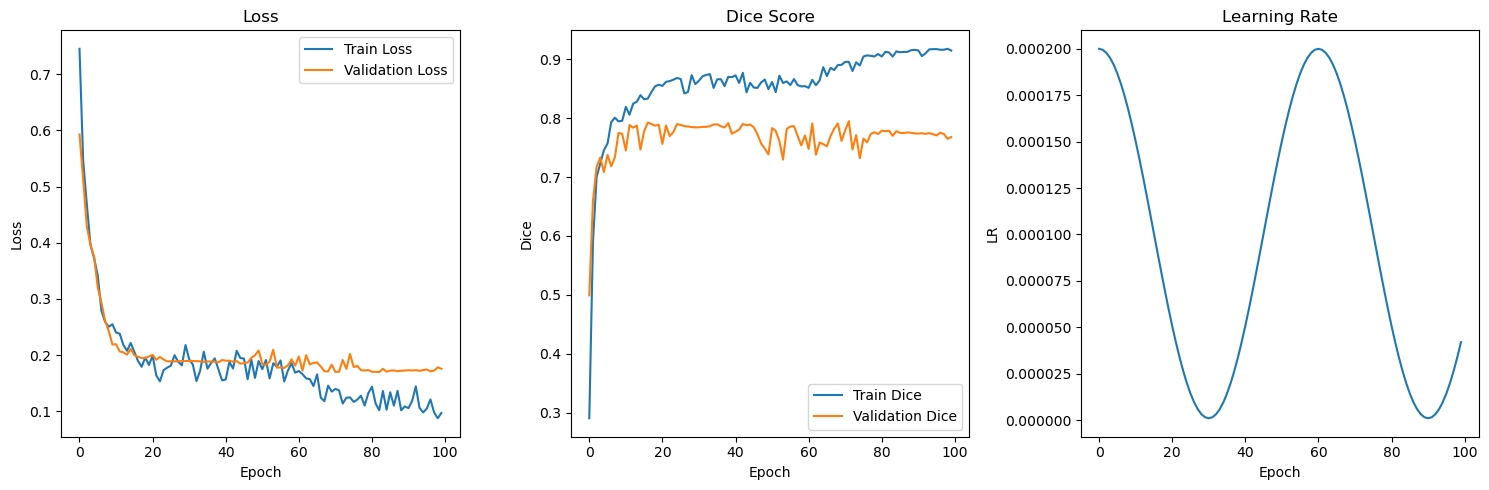

Training completed! Best validation Dice score: 0.7951


In [10]:
# Training loop with early stopping
num_epochs = 100  # Increased epochs with early stopping
best_val_dice = 0.0
early_stopping = EarlyStopping(patience=10)

# Lists to store metrics
train_losses = []
val_losses = []
train_dice_scores = []
val_dice_scores = []
learning_rates = []

try:
    for epoch in range(num_epochs):
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        
        # Train
        train_loss, train_dice = train_one_epoch(model, train_loader, optimizer, criterion, device, scaler)
        train_losses.append(train_loss)
        train_dice_scores.append(train_dice)
        
        # Update learning rate
        current_lr = optimizer.param_groups[0]['lr']
        learning_rates.append(current_lr)
        scheduler.step()
        
        # Free memory before validation
        torch.cuda.empty_cache()
        
        # Validate
        val_loss, val_dice = validate_one_epoch(model, val_loader, criterion, device)
        val_losses.append(val_loss)
        val_dice_scores.append(val_dice)
        
        # Print epoch results
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Dice: {train_dice:.4f}")
        print(f"Validation Loss: {val_loss:.4f}, Validation Dice: {val_dice:.4f}, LR: {current_lr:.6f}")
        
        # Save the best model based on Dice score
        if val_dice > best_val_dice:
            best_val_dice = val_dice
            torch.save(model, 'best_brats_model_dice.pt')
            print(f"Best model saved with Dice score: {best_val_dice:.4f}!")
            
        # Check for early stopping
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print(f"Early stopping triggered after {epoch+1} epochs!")
            break
            
        # Free memory after each epoch
        torch.cuda.empty_cache()

except Exception as e:
    print(f"Error during training: {e}")
    # Save the model even if training is interrupted
    torch.save(model, 'interrupted_brats_model.pt')
    print("Model saved despite interruption!")

# Plot training and validation metrics
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(train_dice_scores, label='Train Dice')
plt.plot(val_dice_scores, label='Validation Dice')
plt.title('Dice Score')
plt.xlabel('Epoch')
plt.ylabel('Dice')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(learning_rates)
plt.title('Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('LR')

plt.tight_layout()
plt.savefig('training_metrics.png')
plt.show()

print(f"Training completed! Best validation Dice score: {best_val_dice:.4f}")

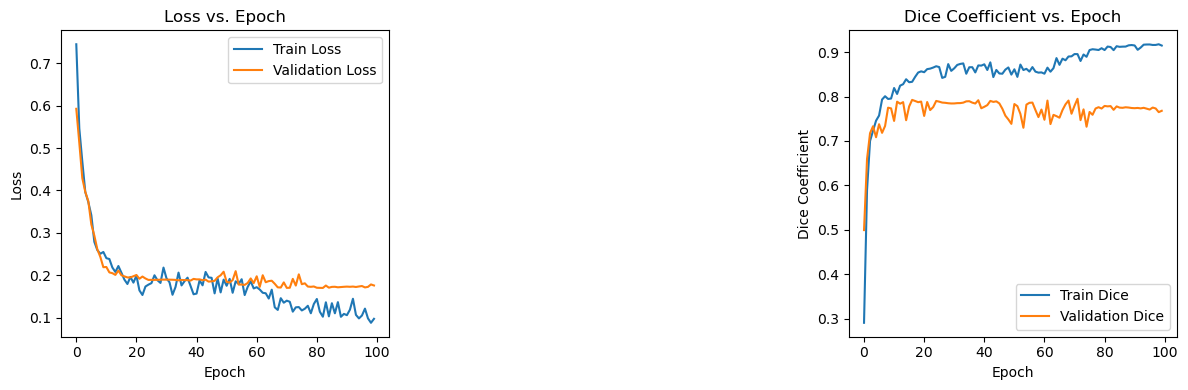

In [11]:
# Plot metrics only if training completed
if len(train_losses) > 0:
    try:        
        # Plot losses
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.plot(train_losses, label='Train Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.title('Loss vs. Epoch')
        
        # Plot Dice scores
        plt.subplot(1, 3, 3)
        plt.plot(train_dice_scores, label='Train Dice')
        plt.plot(val_dice_scores, label='Validation Dice')
        plt.xlabel('Epoch')
        plt.ylabel('Dice Coefficient')
        plt.legend()
        plt.title('Dice Coefficient vs. Epoch')
        
        plt.tight_layout()
        plt.savefig('training_metrics.png')
        plt.show()
    except Exception as e:
        print(f"Error creating plots: {e}")

In [ ]:
import torch

model_path = "C:/Users/mohan/OneDrive/Desktop/laafat/inveep-MEDICIMAGE/Backend/models/best_brats_model_dice.pt"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model with full checkpoint loading
model = torch.load(model_path, map_location=device, weights_only=False)
model = model.to(device)
model.eval()


ImprovedUNet3D(
  (enc1): Sequential(
    (0): Conv3d(4, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): InstanceNorm3d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (4): InstanceNorm3d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
  )
  (pool1): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc2): Sequential(
    (0): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (4): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=False, trac

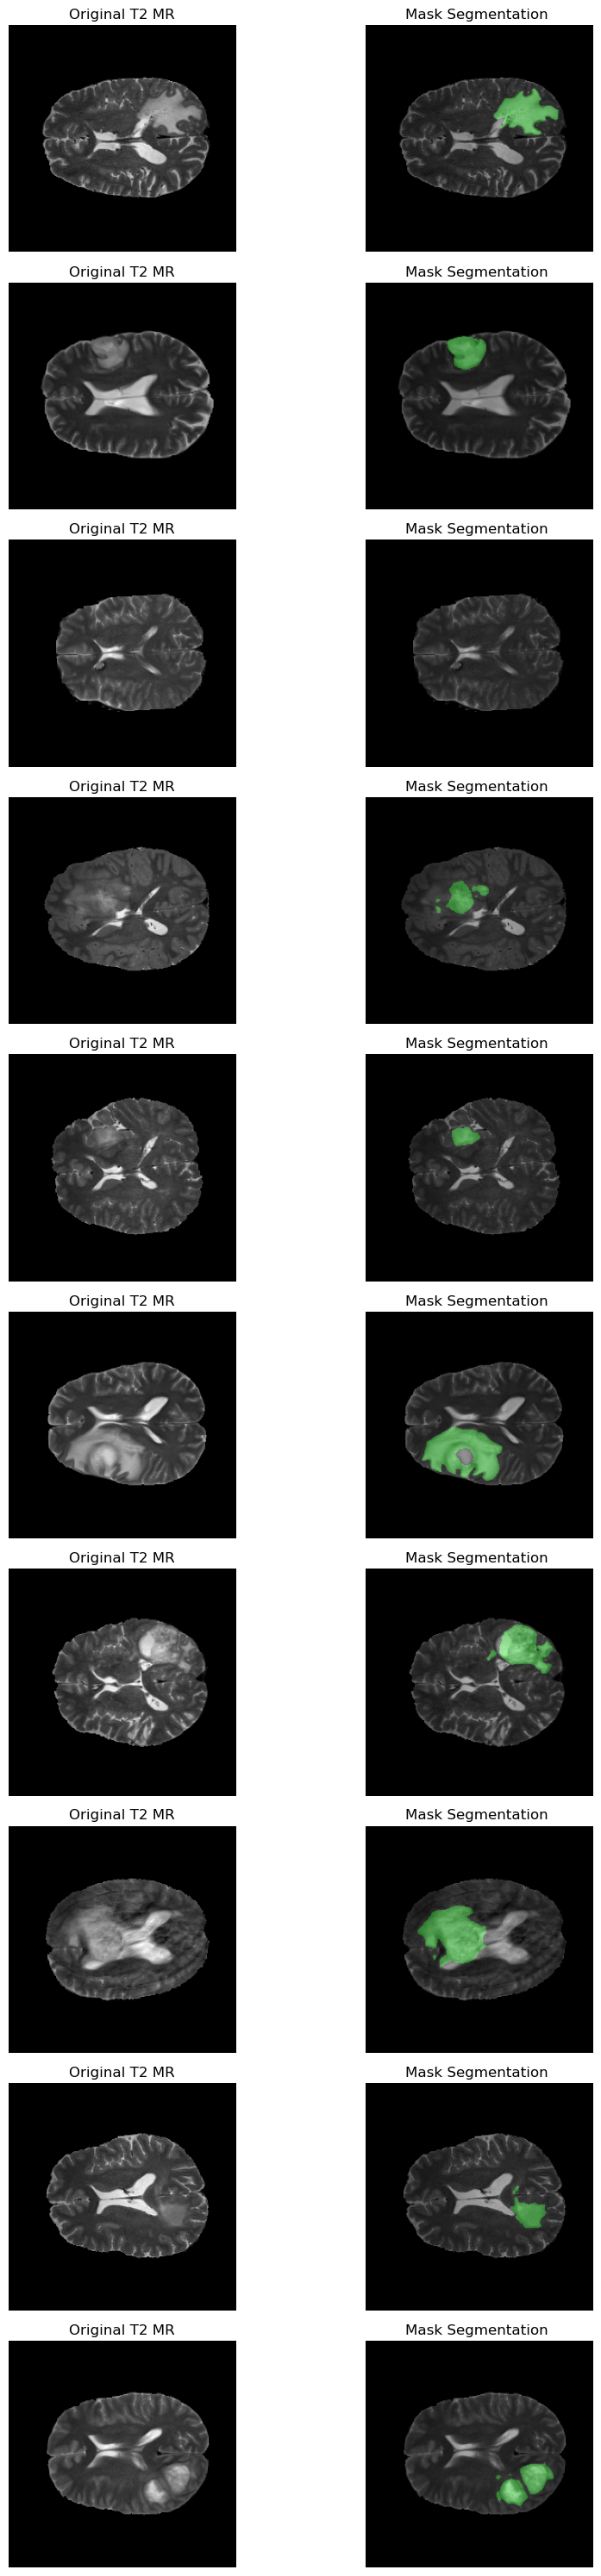

In [18]:
# Take random 10 images
test_iter = iter(test_loader)
num_images = 10
fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 3))

for i in range(num_images):
    test_image = next(test_iter).to(device)  # (1, 4, H, W, D)

    # Prediction with model
    with torch.no_grad():
        output = model(test_image)  # (1, 2, H, W, D)
        prediction = torch.argmax(output, dim=1).cpu().numpy()  # (1, H, W, D)

    # Transform to numpy
    test_image_np = test_image.cpu().numpy()

    # Select middle slice (e.g. D/2)
    slice_idx = test_image_np.shape[4] // 2  # Depth axis D
    t2_slice = test_image_np[0, 3, :, :, slice_idx]  # T2 modality
    pred_mask = prediction[0, :, :, slice_idx]  # Segmentation mask

    # Normalize and convert to 8-bit (For Image)
    t2_slice = cv2.normalize(t2_slice, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Make it colorful
    t2_colored = cv2.cvtColor(t2_slice, cv2.COLOR_GRAY2BGR)

    # Color the segmentation mask
    mask_colored = np.zeros_like(t2_colored)
    mask_colored[:, :, 1] = (pred_mask * 255).astype(np.uint8)  # Green mask

    # Overlay segmentation transparently onto image
    blended = cv2.addWeighted(t2_colored, 0.7, mask_colored, 0.3, 0)

    # Draw images
    axes[i, 0].imshow(t2_colored)
    axes[i, 0].set_title("Original T2 MR")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(blended)
    axes[i, 1].set_title("Mask Segmentation ")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


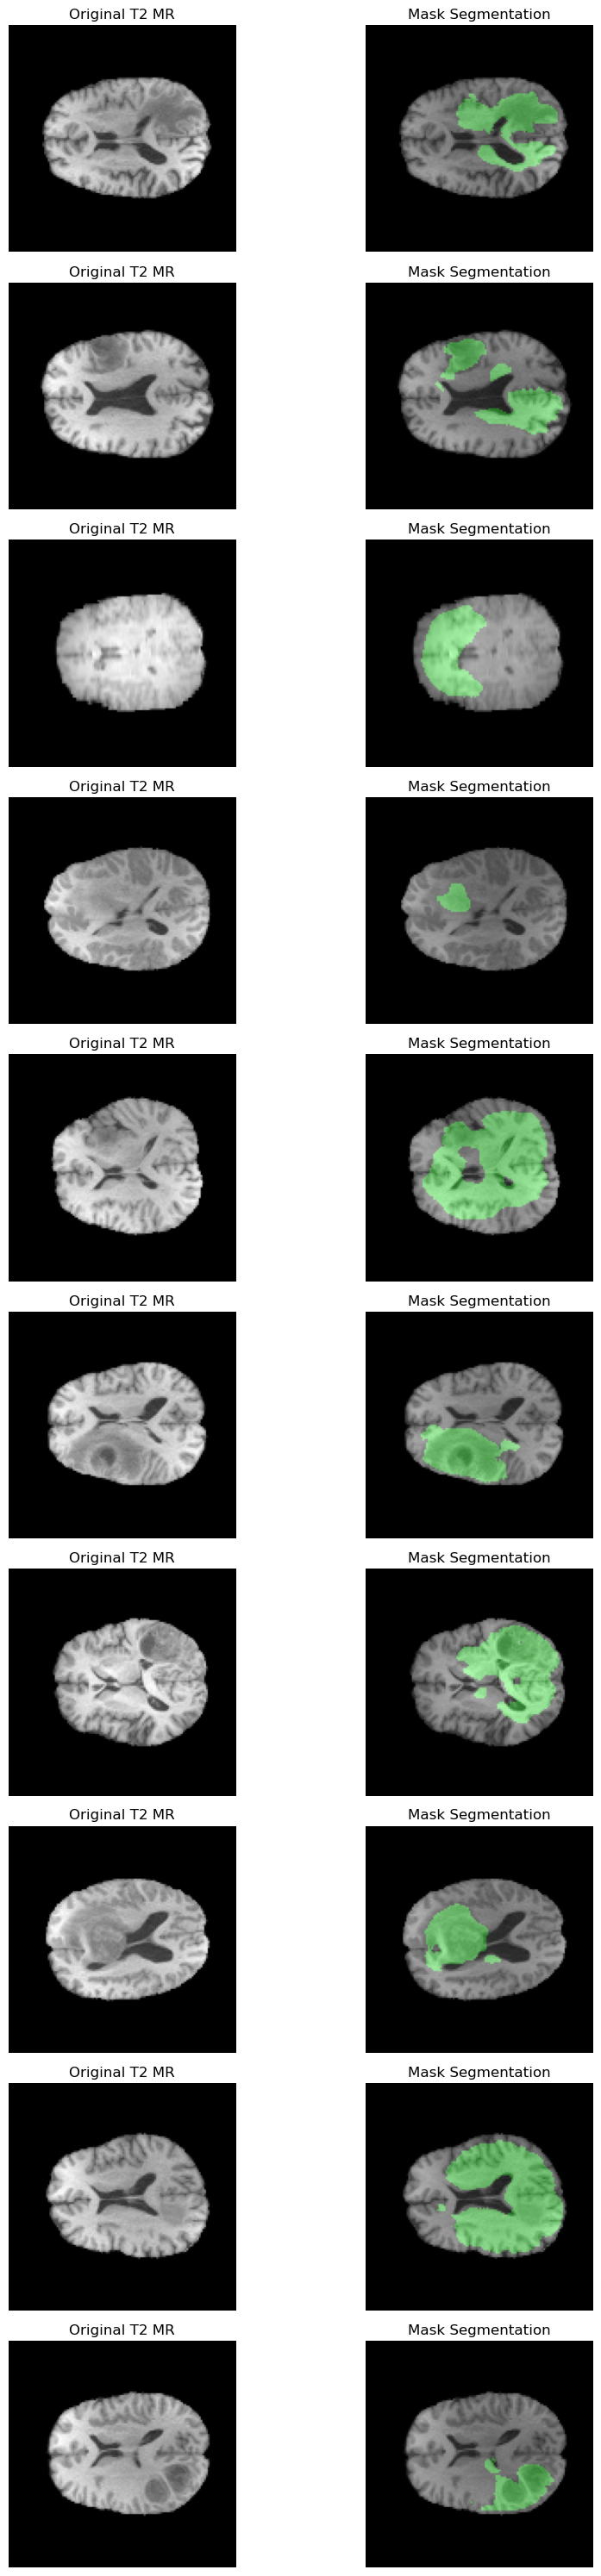

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Take random 10 images
test_iter = iter(test_loader)
num_images = 10
fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 3))

for i in range(num_images):
    test_image = next(test_iter).to(device)  # Shape: (1, 4, H, W, D)

    # Resize input to (128, 128, 128)
    test_image_resized = F.interpolate(
        test_image, size=(128, 128, 128), mode="trilinear", align_corners=False
    )

    # Select 3 out of 4 channels (assume using first 3 channels)
    test_image_resized = test_image_resized[:, :3, :, :, :]

    # Permute dimensions from (1, 3, 128, 128, 128) to (1, 128, 128, 128, 3)
    test_image_resized = test_image_resized.permute(0, 2, 3, 4, 1).contiguous()

    # Convert PyTorch tensor to NumPy array for Keras model
    test_image_resized = test_image_resized.cpu().numpy()

    # Prediction with model (now correctly shaped)
    with torch.no_grad():
        output = model.predict(test_image_resized)  # Shape: (1, 128, 128, 128, 2)
        prediction = np.argmax(output, axis=-1)  # Shape: (1, 128, 128, 128)

    # Select middle slice (Depth D/2)
    slice_idx = test_image_resized.shape[3] // 2
    t2_slice = test_image_resized[0, :, :, slice_idx, 1]  # T2 modality
    pred_mask = prediction[0, :, :, slice_idx]  # Segmentation mask

    # Normalize and convert to 8-bit (for image display)
    t2_slice = cv2.normalize(t2_slice, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    # Convert grayscale to RGB
    t2_colored = cv2.cvtColor(t2_slice, cv2.COLOR_GRAY2BGR)

    # Create segmentation overlay (green mask)
    mask_colored = np.zeros_like(t2_colored)
    mask_colored[:, :, 1] = (pred_mask * 255).astype(np.uint8)

    # Overlay segmentation mask onto image
    blended = cv2.addWeighted(t2_colored, 0.7, mask_colored, 0.3, 0)

    # Draw images
    axes[i, 0].imshow(t2_colored)
    axes[i, 0].set_title("Original T2 MR")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(blended)
    axes[i, 1].set_title("Mask Segmentation")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step


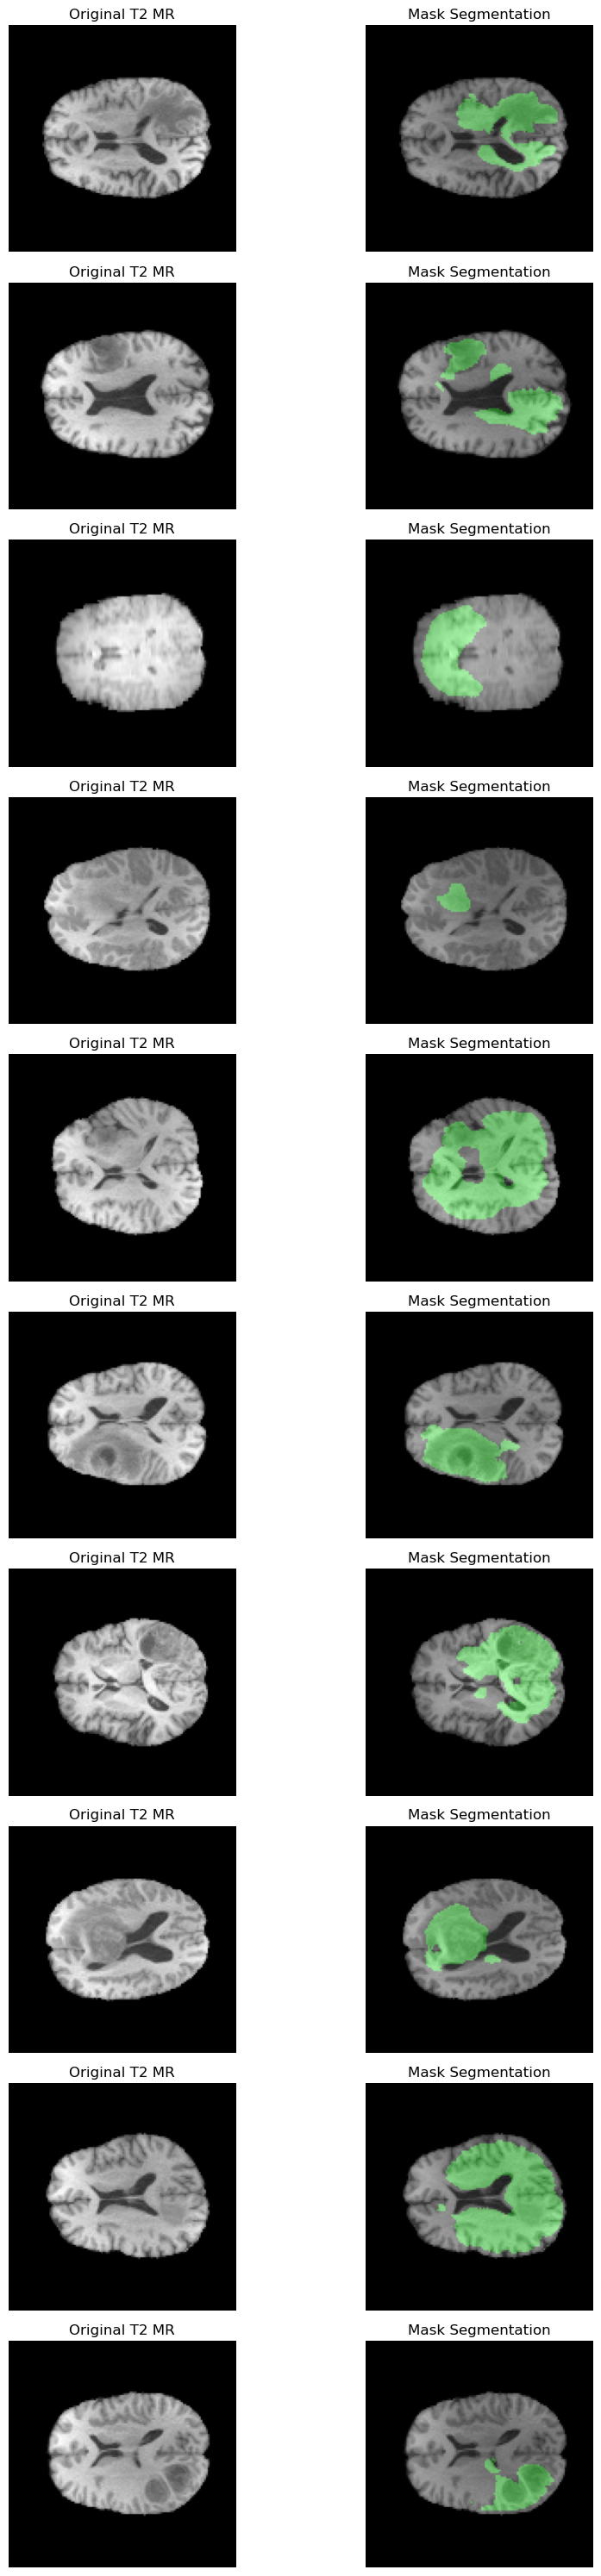

In [41]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.measure import regionprops
import scipy.stats as stats

# Function to calculate tumor volume
def calculate_tumor_volume(mask, voxel_size):
    tumor_voxels = np.sum(mask > 0)  # Count tumor pixels
    volume = tumor_voxels * voxel_size  # Multiply by voxel size to get volume
    return volume

# Function to calculate shape features: compactness and sphericity
def calculate_shape_features(mask):
    # Get properties of the segmented region
    props = regionprops(mask.astype(int))

    # Calculate compactness and sphericity
    compactness = (props[0].area ** (3/2)) / (props[0].perimeter ** (1/2)) if props[0].perimeter != 0 else 0
    sphericity = (np.pi ** (1/3)) * (6 * props[0].area) ** (2/3) / props[0].perimeter if props[0].perimeter != 0 else 0
    return compactness, sphericity

# Function to calculate intensity features: mean, std, skewness
def calculate_intensity_features(t2_slice):
    mean_intensity = np.mean(t2_slice)
    std_intensity = np.std(t2_slice)
    skewness_intensity = stats.skew(t2_slice.flatten())
    return mean_intensity, std_intensity, skewness_intensity

# Placeholder for PyRadiomics extraction (use PyRadiomics for actual extraction)
def extract_radiomic_features(image_path, mask_path):
    # Placeholder: extract radiomic features using PyRadiomics
    # Example code would use the featureextractor from PyRadiomics as shown earlier
    return {'example_feature': 0.5}  # Example placeholder value

# Assume test_loader is defined and the model is loaded
test_iter = iter(test_loader)
num_images = 10
fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 3))

for i in range(num_images):
    test_image = next(test_iter).to(device)  # Shape: (1, 4, H, W, D)

    # Resize input to (128, 128, 128)
    test_image_resized = F.interpolate(test_image, size=(128, 128, 128), mode="trilinear", align_corners=False)
    test_image_resized = test_image_resized[:, :3, :, :, :]  # Select first 3 channels
    test_image_resized = test_image_resized.permute(0, 2, 3, 4, 1).contiguous()  # Change shape

    # Convert to NumPy for prediction
    test_image_resized = test_image_resized.cpu().numpy()

    # Model prediction (segmentation mask)
    with torch.no_grad():
        output = model.predict(test_image_resized)  # (1, 128, 128, 128, 2)
        prediction = np.argmax(output, axis=-1)  # Segmentation mask

    # Select middle slice
    slice_idx = test_image_resized.shape[3] // 2
    t2_slice = test_image_resized[0, :, :, slice_idx, 1]
    pred_mask = prediction[0, :, :, slice_idx]

    # Calculate tumor volume, shape, intensity features
    voxel_size = 1  # Example voxel size (you may need to adjust based on actual voxel spacing)
    tumor_volume = calculate_tumor_volume(pred_mask, voxel_size)
    compactness, sphericity = calculate_shape_features(pred_mask)
    mean_intensity, std_intensity, skewness_intensity = calculate_intensity_features(t2_slice)

    # Extract radiomic features (Placeholder)
    radiomic_features = extract_radiomic_features(image_path='path_to_image', mask_path='path_to_mask')

    # Store the features in a dictionary or DataFrame for model training
    features = {
        'tumor_volume': tumor_volume,
        'compactness': compactness,
        'sphericity': sphericity,
        'mean_intensity': mean_intensity,
        'std_intensity': std_intensity,
        'skewness_intensity': skewness_intensity,
        'radiomic_features': radiomic_features
    }

    # Visualize the segmented mask
    t2_slice = cv2.normalize(t2_slice, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    t2_colored = cv2.cvtColor(t2_slice, cv2.COLOR_GRAY2BGR)

    mask_colored = np.zeros_like(t2_colored)
    mask_colored[:, :, 1] = (pred_mask * 255).astype(np.uint8)
    blended = cv2.addWeighted(t2_colored, 0.7, mask_colored, 0.3, 0)

    # Draw images
    axes[i, 0].imshow(t2_colored)
    axes[i, 0].set_title("Original T2 MR")
    axes[i, 0].axis("off")
    
    axes[i, 1].imshow(blended)
    axes[i, 1].set_title("Mask Segmentation")
    axes[i, 1].axis("off")

# Show the plots
plt.tight_layout()
plt.show()


In [60]:
!pip install scikit-image

In [64]:
!pip install scikit-image scipy opencv-python

In [27]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from skimage import measure
from skimage.measure import regionprops
import scipy.stats as stats
from torch.serialization import safe_globals
from torch.nn import Conv3d, BatchNorm3d, MaxPool3d, ConvTranspose3d, Sequential
def extract_tumor_features(segmentation_mask, original_image=None):
    """
    Final corrected version with full 3D/2D compatibility
    """
    features = {}
    
    # Ensure mask is binary and get dimensionality
    mask = (segmentation_mask > 0).astype(np.uint8)
    is_3d = len(mask.shape) == 3
    
    # Skip empty masks
    if np.sum(mask) == 0:
        return {'tumor_volume': 0, 'is_empty': True}
    
    # ---- 1. Volume Features ----
    features['tumor_volume'] = np.sum(mask)
    features['is_empty'] = False
    
    # ---- 2. Shape Features ----
    labeled_mask = measure.label(mask)
    regions = regionprops(labeled_mask)
    
    # Use the largest region if multiple exist
    largest_region = max(regions, key=lambda r: r.area)
    
    # Common features for both dimensions
    features['area'] = largest_region.area
    features['equivalent_diameter'] = largest_region.equivalent_diameter
    features['centroid'] = largest_region.centroid
    
    # 3D-specific features
    if is_3d:
        features['major_axis_length'] = largest_region.axis_major_length
        features['minor_axis_length'] = largest_region.axis_minor_length
        features['solidity'] = largest_region.solidity
        features['extent'] = largest_region.extent
        
        # Surface area calculation
        try:
            verts, faces, _, _ = measure.marching_cubes(mask, level=0.5)
            features['surface_area'] = measure.mesh_surface_area(verts, faces)
            features['surface_to_volume_ratio'] = (features['surface_area'] / 
                                                 features['tumor_volume']) if features['tumor_volume'] > 0 else 0
            features['sphericity'] = (np.pi ** (1/3) * (6 * features['tumor_volume']) ** (2/3)) / features['surface_area'] if features['surface_area'] > 0 else 0
        except:
            features['surface_area'] = 0
            features['surface_to_volume_ratio'] = 0
            features['sphericity'] = 0
            
    # 2D-specific features
    else:
        features['perimeter'] = largest_region.perimeter
        features['major_axis_length'] = largest_region.major_axis_length
        features['minor_axis_length'] = largest_region.minor_axis_length
        features['orientation'] = largest_region.orientation
        features['eccentricity'] = largest_region.eccentricity
        features['solidity'] = largest_region.solidity
        features['extent'] = largest_region.extent
        
        # Shape descriptors
        if features['perimeter'] > 0:
            features['circularity'] = (4 * np.pi * features['area']) / (features['perimeter'] ** 2)
            features['compactness'] = np.sqrt(4 * np.pi * features['area']) / features['perimeter']
        else:
            features['circularity'] = 0
            features['compactness'] = 0

    
    # ---- 3. Intensity Features (if original image is provided) ----
    if original_image is not None:
        # Get pixel values inside tumor
        tumor_pixels = original_image[mask == 1]
        
        # Basic statistics
        features['mean_intensity'] = np.mean(tumor_pixels)
        features['median_intensity'] = np.median(tumor_pixels)
        features['min_intensity'] = np.min(tumor_pixels)
        features['max_intensity'] = np.max(tumor_pixels)
        features['std_intensity'] = np.std(tumor_pixels)
        features['variance_intensity'] = np.var(tumor_pixels)
        
        # Higher-order statistics
        features['skewness'] = stats.skew(tumor_pixels) if len(tumor_pixels) > 0 else 0
        features['kurtosis'] = stats.kurtosis(tumor_pixels) if len(tumor_pixels) > 0 else 0
        
        # Quartiles and IQR
        features['q1_intensity'] = np.percentile(tumor_pixels, 25)
        features['q3_intensity'] = np.percentile(tumor_pixels, 75)
        features['iqr_intensity'] = features['q3_intensity'] - features['q1_intensity']
        
        # Entropy
        hist, _ = np.histogram(tumor_pixels, bins=32, density=True)
        hist = hist[hist > 0]  # Remove zero bins
        features['entropy'] = -np.sum(hist * np.log2(hist)) if len(hist) > 0 else 0
        
        # Add texture features using GLCM (Gray Level Co-occurrence Matrix)
        if len(tumor_pixels) > 0:
            # Extract ROI for GLCM calculation
            roi = np.zeros_like(original_image)
            roi[mask == 1] = original_image[mask == 1]
            
            # Normalize to uint8 for GLCM
            if roi.max() > 0:
                roi_norm = cv2.normalize(roi, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
                
                # Calculate GLCM
                glcm_features = calculate_glcm_features(roi_norm, mask)
                features.update(glcm_features)
    
    return features

def calculate_glcm_features(image, mask):
    """
    Calculate GLCM (Gray Level Co-occurrence Matrix) features without using radiomics
    
    Parameters:
    -----------
    image : numpy.ndarray
        Normalized image (0-255)
    mask : numpy.ndarray
        Binary mask
        
    Returns:
    --------
    dict
        Dictionary of GLCM features
    """
    features = {}
    
    # Get bounding box of the mask to reduce computation
    if len(mask.shape) == 3:  # 3D mask
        # For simplicity, compute on a representative 2D slice
        # Find the slice with the largest tumor area
        slice_areas = [np.sum(mask[:, :, i]) for i in range(mask.shape[2])]
        if not slice_areas or max(slice_areas) == 0:
            return features
            
        max_slice = np.argmax(slice_areas)
        mask_2d = mask[:, :, max_slice]
        img_2d = image[:, :, max_slice]
    else:  # 2D mask
        mask_2d = mask
        img_2d = image
    
    # Get indices where mask is true
    y_indices, x_indices = np.where(mask_2d > 0)
    if len(y_indices) == 0:
        return features
        
    # Find bounding box
    y_min, y_max = np.min(y_indices), np.max(y_indices)
    x_min, x_max = np.min(x_indices), np.max(x_indices)
    
    # Extract ROI
    roi = img_2d[y_min:y_max+1, x_min:x_max+1]
    roi_mask = mask_2d[y_min:y_max+1, x_min:x_max+1]
    
    if roi.size == 0 or np.sum(roi_mask) == 0:
        return features
    
    # Calculate GLCM
    # Reduce gray levels for manageable computation
    n_levels = 16
    roi_quantized = np.round((roi / 255.0) * (n_levels - 1)).astype(np.uint8)
    
    # Calculate GLCMs for different directions
    distances = [1]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # 0, 45, 90, 135 degrees
    
    # Initialize GLCM features
    contrast_values = []
    dissimilarity_values = []
    homogeneity_values = []
    energy_values = []
    correlation_values = []
    
    for angle in angles:
        # Calculate GLCM manually
        glcm = np.zeros((n_levels, n_levels), dtype=np.float64)
        
        height, width = roi_quantized.shape
        cos_angle = np.cos(angle)
        sin_angle = np.sin(angle)
        
        for i in range(height):
            for j in range(width):
                if roi_mask[i, j] == 0:
                    continue
                    
                i_offset = int(round(sin_angle))
                j_offset = int(round(cos_angle))
                
                ni, nj = i + i_offset, j + j_offset
                
                if 0 <= ni < height and 0 <= nj < width and roi_mask[ni, nj] > 0:
                    glcm[roi_quantized[i, j], roi_quantized[ni, nj]] += 1
        
        # Normalize GLCM
        if glcm.sum() > 0:
            glcm = glcm / glcm.sum()
            
            # Calculate features
            # Contrast
            contrast = 0
            for i in range(n_levels):
                for j in range(n_levels):
                    contrast += glcm[i, j] * ((i - j) ** 2)
            contrast_values.append(contrast)
            
            # Dissimilarity
            dissimilarity = 0
            for i in range(n_levels):
                for j in range(n_levels):
                    dissimilarity += glcm[i, j] * abs(i - j)
            dissimilarity_values.append(dissimilarity)
            
            # Homogeneity
            homogeneity = 0
            for i in range(n_levels):
                for j in range(n_levels):
                    homogeneity += glcm[i, j] / (1 + (i - j) ** 2)
            homogeneity_values.append(homogeneity)
            
            # Energy
            energy = np.sum(glcm ** 2)
            energy_values.append(energy)
            
            # ASM (Angular Second Moment)
            asm = energy  # Same as energy
            
            # Compute mean and standard deviation
            i_indices = np.arange(n_levels).reshape(-1, 1) * np.ones((n_levels, n_levels))
            j_indices = np.arange(n_levels).reshape(1, -1) * np.ones((n_levels, n_levels))
            
            u_i = np.sum(i_indices * glcm)
            u_j = np.sum(j_indices * glcm)
            
            var_i = np.sum(((i_indices - u_i) ** 2) * glcm)
            var_j = np.sum(((j_indices - u_j) ** 2) * glcm)
            
            # Correlation
            if var_i > 0 and var_j > 0:
                sigma_i = np.sqrt(var_i)
                sigma_j = np.sqrt(var_j)
                
                correlation = 0
                for i in range(n_levels):
                    for j in range(n_levels):
                        correlation += (glcm[i, j] * (i - u_i) * (j - u_j)) / (sigma_i * sigma_j)
                correlation_values.append(correlation)
    
    # Average across angles
    if contrast_values:
        features['glcm_contrast'] = np.mean(contrast_values)
    if dissimilarity_values:
        features['glcm_dissimilarity'] = np.mean(dissimilarity_values)
    if homogeneity_values:
        features['glcm_homogeneity'] = np.mean(homogeneity_values)
    if energy_values:
        features['glcm_energy'] = np.mean(energy_values)
    if correlation_values:
        features['glcm_correlation'] = np.mean(correlation_values)
    
    return features

def extract_2d_slice_features(mask_slice, image_slice=None):
    """
    Extract features from 2D slices
    """
    features = {}
    
    # Basic shape features
    if np.sum(mask_slice) > 0:
        # Get contours
        contours, _ = cv2.findContours(mask_slice.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if len(contours) > 0:
            # Use largest contour
            largest_contour = max(contours, key=cv2.contourArea)
            
            # Area and perimeter
            area = cv2.contourArea(largest_contour)
            perimeter = cv2.arcLength(largest_contour, True)
            
            features['area'] = area
            features['perimeter'] = perimeter
            
            # Circularity
            features['circularity'] = (4 * np.pi * area) / (perimeter * perimeter) if perimeter > 0 else 0
            
            # Bounding box
            x, y, w, h = cv2.boundingRect(largest_contour)
            features['bounding_box_width'] = w
            features['bounding_box_height'] = h
            features['bounding_box_ratio'] = w / h if h > 0 else 0
            
            # Moments
            M = cv2.moments(largest_contour)
            if M['m00'] != 0:
                features['center_of_mass_x'] = M['m10'] / M['m00']
                features['center_of_mass_y'] = M['m01'] / M['m00']
                
            # Hu Moments (rotation, scale and translation invariant)
            hu_moments = cv2.HuMoments(M)
            for i, hu in enumerate(hu_moments):
                features[f'hu_moment_{i+1}'] = -np.sign(hu) * np.log10(abs(hu)) if hu != 0 else 0
    
    # Intensity features if original image is provided
    if image_slice is not None and np.sum(mask_slice) > 0:
        # Get pixel values inside tumor
        tumor_pixels = image_slice[mask_slice > 0]
        
        # Basic statistics
        features['mean_intensity'] = np.mean(tumor_pixels)
        features['std_intensity'] = np.std(tumor_pixels)
        features['min_intensity'] = np.min(tumor_pixels)
        features['max_intensity'] = np.max(tumor_pixels)
        
        # Gradient magnitude (edge strength)
        if image_slice.dtype != np.uint8:
            img_norm = cv2.normalize(image_slice, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        else:
            img_norm = image_slice
            
        gx = cv2.Sobel(img_norm, cv2.CV_32F, 1, 0, ksize=3)
        gy = cv2.Sobel(img_norm, cv2.CV_32F, 0, 1, ksize=3)
        gradient_mag = cv2.magnitude(gx, gy)
        tumor_gradient = gradient_mag[mask_slice > 0]
        
        features['mean_gradient'] = np.mean(tumor_gradient)
        features['max_gradient'] = np.max(tumor_gradient)
        
        # Calculate additional texture features
        if len(tumor_pixels) > 25:  # Need some minimum area for meaningful texture
            # Create a mask ROI
            roi = np.zeros_like(image_slice)
            roi[mask_slice > 0] = image_slice[mask_slice > 0]
            
            # Normalize for texture calculation
            if roi.max() > 0:
                roi_norm = cv2.normalize(roi, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
                
                # Calculate LBP (Local Binary Pattern) features
                lbp_features = calculate_lbp_features(roi_norm, mask_slice)
                features.update(lbp_features)
                
                # Calculate Haralick texture features
                haralick_features = calculate_haralick_features(roi_norm, mask_slice)
                features.update(haralick_features)
    
    return features

def calculate_lbp_features(image, mask):
    """
    Calculate simplified Local Binary Pattern features
    """
    features = {}
    
    # Extract ROI
    y_indices, x_indices = np.where(mask > 0)
    if len(y_indices) == 0:
        return features
        
    # Find bounding box
    y_min, y_max = np.min(y_indices), np.max(y_indices)
    x_min, x_max = np.min(x_indices), np.max(x_indices)
    
    # Extract ROI
    roi = image[y_min:y_max+1, x_min:x_max+1]
    roi_mask = mask[y_min:y_max+1, x_min:x_max+1]
    
    if roi.size == 0 or np.sum(roi_mask) == 0:
        return features
    
    # Calculate LBP
    height, width = roi.shape
    lbp = np.zeros_like(roi)
    
    for i in range(1, height-1):
        for j in range(1, width-1):
            if roi_mask[i, j] == 0:
                continue
                
            center = roi[i, j]
            code = 0
            
            # Clock-wise: top-left, top, top-right, right, bottom-right, bottom, bottom-left, left
            neighbors = [
                roi[i-1, j-1], roi[i-1, j], roi[i-1, j+1],
                roi[i, j+1], roi[i+1, j+1], roi[i+1, j],
                roi[i+1, j-1], roi[i, j-1]
            ]
            
            # Compute binary pattern
            for k, n in enumerate(neighbors):
                if n >= center:
                    code += 2**k
                    
            lbp[i, j] = code
    
    # Extract only LBP values within the mask
    lbp_values = lbp[roi_mask > 0]
    
    if len(lbp_values) > 0:
        # Basic statistics of LBP values
        features['lbp_mean'] = np.mean(lbp_values)
        features['lbp_std'] = np.std(lbp_values)
        features['lbp_kurtosis'] = stats.kurtosis(lbp_values) if len(lbp_values) > 0 else 0
        features['lbp_skewness'] = stats.skew(lbp_values) if len(lbp_values) > 0 else 0
        
        # LBP histogram features (simplified)
        hist, _ = np.histogram(lbp_values, bins=8, range=(0, 256))
        hist = hist / np.sum(hist) if np.sum(hist) > 0 else hist
        
        for i, h in enumerate(hist):
            features[f'lbp_hist_bin_{i}'] = h
    
    return features

def calculate_haralick_features(image, mask):
    """
    Calculate Haralick texture features (simplified version without using radiomics)
    """
    features = {}
    
    # Create masked version
    masked_img = np.zeros_like(image)
    masked_img[mask > 0] = image[mask > 0]
    
    # Calculate GLCM features using OpenCV
    if np.sum(mask) > 0:
        # Get ROI
        y_indices, x_indices = np.where(mask > 0)
        if len(y_indices) == 0:
            return features
            
        # Find bounding box
        y_min, y_max = np.min(y_indices), np.max(y_indices)
        x_min, x_max = np.min(x_indices), np.max(x_indices)
        
        # Extract ROI
        roi = image[y_min:y_max+1, x_min:x_max+1]
        roi_mask = mask[y_min:y_max+1, x_min:x_max+1]
        
        if roi.size == 0 or np.sum(roi_mask) < 5:  # Need minimum size for texture
            return features
        
        # Apply mask
        masked_roi = np.zeros_like(roi)
        masked_roi[roi_mask > 0] = roi[roi_mask > 0]
        
        # Calculate gray level co-occurrence matrix manually
        n_levels = 8  # Reduced number of gray levels
        roi_quantized = np.round((masked_roi / 255.0) * (n_levels - 1)).astype(np.uint8)
        
        directions = [(0, 1), (1, 0), (1, 1), (-1, 1)]  # 0°, 90°, 45°, 135°
        glcm_features = {}
        
        for d_name, (di, dj) in zip(['0deg', '90deg', '45deg', '135deg'], directions):
            glcm = np.zeros((n_levels, n_levels), dtype=np.float64)
            height, width = roi_quantized.shape
            
            for i in range(height):
                for j in range(width):
                    if roi_mask[i, j] == 0:
                        continue
                        
                    ni, nj = i + di, j + dj
                    
                    if 0 <= ni < height and 0 <= nj < width and roi_mask[ni, nj] > 0:
                        glcm[roi_quantized[i, j], roi_quantized[ni, nj]] += 1
            
            # Symmetrize
            glcm = glcm + glcm.T
            
            # Normalize
            if glcm.sum() > 0:
                glcm = glcm / glcm.sum()
                
                # Calculate Haralick features
                # 1. Angular Second Moment (Energy)
                asm = np.sum(glcm ** 2)
                glcm_features[f'haralick_energy_{d_name}'] = asm
                
                # 2. Contrast
                contrast = 0
                for i in range(n_levels):
                    for j in range(n_levels):
                        contrast += glcm[i, j] * ((i - j) ** 2)
                glcm_features[f'haralick_contrast_{d_name}'] = contrast
                
                # 3. Correlation
                i_indices = np.arange(n_levels).reshape(-1, 1)
                j_indices = np.arange(n_levels).reshape(1, -1)
                
                u_i = np.sum(glcm * i_indices)
                u_j = np.sum(glcm * j_indices)
                
                sigma_i = np.sqrt(np.sum(glcm * ((i_indices - u_i) ** 2)))
                sigma_j = np.sqrt(np.sum(glcm * ((j_indices - u_j) ** 2)))
                
                if sigma_i > 0 and sigma_j > 0:
                    correlation = 0
                    for i in range(n_levels):
                        for j in range(n_levels):
                            correlation += ((i - u_i) * (j - u_j) * glcm[i, j]) / (sigma_i * sigma_j)
                    glcm_features[f'haralick_correlation_{d_name}'] = correlation
                
                # 4. Homogeneity (Inverse Difference Moment)
                homogeneity = 0
                for i in range(n_levels):
                    for j in range(n_levels):
                        homogeneity += glcm[i, j] / (1 + (i - j) ** 2)
                glcm_features[f'haralick_homogeneity_{d_name}'] = homogeneity
        
        # Average features across directions
        for feature_name in ['energy', 'contrast', 'correlation', 'homogeneity']:
            feature_values = [v for k, v in glcm_features.items() if f'haralick_{feature_name}_' in k]
            if feature_values:
                features[f'haralick_{feature_name}_mean'] = np.mean(feature_values)
    
    return features

def process_3d_volume(mask_volume, image_volume=None):
    """
    Process a 3D volume with proper numeric feature handling
    """
    all_features = {}
    
    # Extract 3D volume features
    volume_features = extract_tumor_features(mask_volume, image_volume)
    all_features.update({f"3d_{k}": v for k, v in volume_features.items()})
    
    # Extract slice-by-slice 2D features
    slice_features = []
    for z in range(mask_volume.shape[2]):
        mask_slice = mask_volume[:, :, z]
        image_slice = None if image_volume is None else image_volume[:, :, z]
        if np.sum(mask_slice) > 0:
            features = extract_2d_slice_features(mask_slice, image_slice)
            slice_features.append(features)
    
    # Aggregate 2D features properly
    if slice_features:
        df = pd.DataFrame(slice_features)
        
        # Only aggregate numeric columns
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        
        for col in numeric_cols:
            all_features[f"2d_{col}_mean"] = df[col].mean()
            all_features[f"2d_{col}_max"] = df[col].max()
            all_features[f"2d_{col}_median"] = df[col].median()
            all_features[f"2d_{col}_std"] = df[col].std()
    
    return all_features

# Directly use the feature extraction on already generated segmentation masks
def extract_features_from_segmentations(prediction_masks, original_images, patient_ids=None):
    """
    Extract features from already generated segmentation masks
    
    Parameters:
    -----------
    prediction_masks : list of numpy.ndarray
        List of segmentation masks (one per patient)
    original_images : list of numpy.ndarray
        List of original images with modalities (one per patient)
    patient_ids : list of str, optional
        List of patient IDs
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame containing all extracted features
    """
    all_features = []
    
    for i, mask in enumerate(prediction_masks):
        # Get corresponding original image
        image = original_images[i]
        
        # Patient ID
        patient_id = f"patient_{i}" if patient_ids is None else patient_ids[i]
        
        # Extract features for each modality
        features = {"patient_id": patient_id}
        
        # Assuming image is of shape [4, H, W, D] with 4 modalities
        t1_volume = image[0]      # T1 modality
        t1ce_volume = image[1]    # T1CE modality 
        flair_volume = image[2]   # FLAIR modality
        t2_volume = image[3]      # T2 modality
        
        # Extract features for each modality
        t1_features = process_3d_volume(mask, t1_volume)
        features.update({f"t1_{k}": v for k, v in t1_features.items()})
        
        t1ce_features = process_3d_volume(mask, t1ce_volume)
        features.update({f"t1ce_{k}": v for k, v in t1ce_features.items()})
        
        t2_features = process_3d_volume(mask, t2_volume)
        features.update({f"t2_{k}": v for k, v in t2_features.items()})
        
        flair_features = process_3d_volume(mask, flair_volume)
        features.update({f"flair_{k}": v for k, v in flair_features.items()})
        
        # Modality-independent features (based only on mask)
        mask_features = process_3d_volume(mask)
        features.update({f"mask_{k}": v for k, v in mask_features.items()})
        
        # Add to collection
        all_features.append(features)
    
    # Convert to DataFrame
    df = pd.DataFrame(all_features)
    
    return df

# Example usage for direct integration with your visualization code
def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_path = "C:/Users/MSI/Downloads/best_brats_model_dice.pt"
    
    # Load the entire model directly (not just state_dict)
    model = torch.load(
        model_path,
        map_location=device,
        weights_only=False  # Required for full model loading
    ).to(device)
    
    model.eval()
    
    # Assuming you have a test_loader already defined
    # Use your existing visualization code to get predictions
    test_iter = iter(test_loader)
    num_images = 10
    
    # Lists to store results
    all_prediction_masks = []
    all_original_images = []
    all_patient_ids = []
    
    # Use your existing code to generate predictions
    for i in range(num_images):
        # Get next test sample
        test_batch = next(test_iter)
        
        if isinstance(test_batch, tuple) and len(test_batch) >= 2:
            if len(test_batch) == 3:  # With patient IDs
                test_image, _, patient_id = test_batch
                all_patient_ids.append(patient_id)
            else:  # Without patient IDs
                test_image, _ = test_batch
                all_patient_ids.append(f"patient_{i}")
        else:  # Just the image
            test_image = test_batch
            all_patient_ids.append(f"patient_{i}")
            
        test_image = test_image.to(device)
        
        # Prediction with model
        with torch.no_grad():
            output = model(test_image)  # (1, 2, H, W, D)
            prediction = torch.argmax(output, dim=1).cpu().numpy()  # (1, H, W, D)
        
        # Store the prediction mask
        all_prediction_masks.append(prediction[0])  # Remove batch dimension
        
        # Store the original image (all modalities)
        all_original_images.append(test_image[0].cpu().numpy())  # Remove batch dimension
    
    # Extract features from the generated segmentation masks
    features_df = extract_features_from_segmentations(
        all_prediction_masks, 
        all_original_images,
        all_patient_ids
    )
    
    # Save features to CSV
    features_df.to_csv('tumor_features_for_survival.csv', index=False)
    print(f"Extracted {len(features_df.columns)} features from {len(features_df)} patients")
    
    # Return for further analysis
    return features_df

if __name__ == "__main__":
    features = main()

Extracted 641 features from 10 patients


In [2]:
import pandas as pd 
pd.set_option('display.max_columns', None)

In [ ]:
# or
dfext = pd.read_csv("C:/Users/MSI/Downloads/tumor_features_for_survival.xls", delimiter=',')  # If comma-delimited

In [4]:
dfext.head(10)

patient_id  t1_3d_tumor_volume  t1_3d_is_empty  t1_3d_area  \
0  patient_0               63402           False     63402.0   
1  patient_1               31172           False     31172.0   
2  patient_2               14104           False     14094.0   
3  patient_3               53360           False     53360.0   
4  patient_4               28565           False     28453.0   
5  patient_5               85371           False     85371.0   
6  patient_6               67109           False     67109.0   
7  patient_7              103548           False    103548.0   
8  patient_8               33809           False     33809.0   
9  patient_9               49055           False     48759.0   

   t1_3d_equivalent_diameter  \
0                  49.472985   
1                  39.047091   
2                  29.969435   
3                  46.709555   
4                  37.877079   
5                  54.630761   
6                  50.418979   
7                  58.261415   
8                  40.118489   
9                  45.326487   

                                      t1_3d_centroid  t1_3d_major_axis_length  \
0  (92.85169237563484, 163.98339169111384, 26.414...                82.325251   
1  (72.34656101629668, 107.18295264981394, 17.979...                47.966161   
2  (150.15978430537817, 135.129132964382, 33.9462...                48.763803   
3  (106.66832833583209, 103.96791604197901, 30.70...                85.320887   
4  (86.70895863353601, 106.30893051699293, 7.9843...                57.906036   
5  (149.4783005938785, 104.2990359724028, 22.9928...               101.171756   
6  (84.77155076070274, 164.9018313489994, 23.6879...                72.541294   
7  (114.52102406613358, 92.75933866419439, 25.162...                80.627840   
8  (136.09577331479784, 172.6220237214943, 9.7596...                71.056896   
9  (151.68963678500378, 165.40437662790458, 24.51...                73.397306   

   t1_3d_minor_axis_length  t1_3d_solidity  t1_3d_extent  t1_3d_surface_area  \
0                35.434275        0.698345      0.363344        11119.750000   
1                36.322307        0.875520      0.489818         5194.183594   
2                16.429286        0.785794      0.410664         2878.999756   
3                24.303977        0.723192      0.316421         9585.527344   
4                27.010411        0.756910      0.263322         5670.168945   
5                39.315632        0.701654      0.388969        16716.373047   
6                42.376375        0.670701      0.404856        12498.649414   
7                41.835922        0.808842      0.390099        12358.922852   
8                29.610396        0.632950      0.318706         7038.963867   
9                38.759455        0.718746      0.356738         9606.965820   

   t1_3d_surface_to_volume_ratio  t1_3d_sphericity  t1_3d_mean_intensity  \
0                       0.175385          0.691498              3.368117   
1                       0.166630          0.922168              3.759543   
2                       0.204126          0.980552              3.635145   
3                       0.179639          0.715065              4.343731   
4                       0.198501          0.796974              3.256491   
5                       0.195809          0.560896              3.290627   
6                       0.186244          0.638962              3.123891   
7                       0.119355          0.862842              3.261336   
8                       0.208198          0.718340              3.046643   
9                       0.195841          0.674559              3.577276   

   t1_3d_median_intensity  t1_3d_min_intensity  t1_3d_max_intensity  \
0                3.584886            -0.339948             5.858582   
1                3.791410            -0.624729             8.671779   
2                3.445000             1.227826             6.425867   
3                3.174980            -0.351755    

In [5]:
import pandas as pd

# Load extracted features (single file)

# Load survival data
survival_train = pd.read_csv("C:/Users/MSI/Downloads/archive (24)/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/survival_info.csv")

# Check dataset structure
print(dfext.columns)
print(survival_train.columns)



Index(['patient_id', 't1_3d_tumor_volume', 't1_3d_is_empty', 't1_3d_area',
       't1_3d_equivalent_diameter', 't1_3d_centroid',
       't1_3d_major_axis_length', 't1_3d_minor_axis_length', 't1_3d_solidity',
       't1_3d_extent',
       ...
       'mask_2d_bounding_box_ratio_median', 'mask_2d_bounding_box_ratio_std',
       'mask_2d_center_of_mass_x_mean', 'mask_2d_center_of_mass_x_max',
       'mask_2d_center_of_mass_x_median', 'mask_2d_center_of_mass_x_std',
       'mask_2d_center_of_mass_y_mean', 'mask_2d_center_of_mass_y_max',
       'mask_2d_center_of_mass_y_median', 'mask_2d_center_of_mass_y_std'],
      dtype='object', length=641)
Index(['Brats20ID', 'Age', 'Survival_days', 'Extent_of_Resection'], dtype='object')


In [6]:
survival_train.head()

Brats20ID     Age Survival_days Extent_of_Resection
0  BraTS20_Training_001  60.463           289                 GTR
1  BraTS20_Training_002  52.263           616                 GTR
2  BraTS20_Training_003  54.301           464                 GTR
3  BraTS20_Training_004  39.068           788                 GTR
4  BraTS20_Training_005  68.493           465                 GTR

In [7]:
# Standardize column names
survival_train.rename(columns={"Brats20ID": "patient_id"}, inplace=True)


In [8]:
dfext["patient_id"] = dfext["patient_id"].astype(str).str.strip()
survival_train["patient_id"] = survival_train["patient_id"].astype(str).str.strip()



In [9]:
# Extract numeric part from dfext and format it to match survival_train IDs
dfext["patient_id"] = dfext["patient_id"].str.extract(r'(\d+)')
dfext["patient_id"] = "BraTS20_Training_" + dfext["patient_id"].astype(str).str.zfill(3)  # Add leading zeros if needed


In [10]:
dfext.head()

patient_id  t1_3d_tumor_volume  t1_3d_is_empty  t1_3d_area  \
0  BraTS20_Training_000               63402           False     63402.0   
1  BraTS20_Training_001               31172           False     31172.0   
2  BraTS20_Training_002               14104           False     14094.0   
3  BraTS20_Training_003               53360           False     53360.0   
4  BraTS20_Training_004               28565           False     28453.0   

   t1_3d_equivalent_diameter  \
0                  49.472985   
1                  39.047091   
2                  29.969435   
3                  46.709555   
4                  37.877079   

                                      t1_3d_centroid  t1_3d_major_axis_length  \
0  (92.85169237563484, 163.98339169111384, 26.414...                82.325251   
1  (72.34656101629668, 107.18295264981394, 17.979...                47.966161   
2  (150.15978430537817, 135.129132964382, 33.9462...                48.763803   
3  (106.66832833583209, 103.96791604197901, 30.70...                85.320887   
4  (86.70895863353601, 106.30893051699293, 7.9843...                57.906036   

   t1_3d_minor_axis_length  t1_3d_solidity  t1_3d_extent  t1_3d_surface_area  \
0                35.434275        0.698345      0.363344        11119.750000   
1                36.322307        0.875520      0.489818         5194.183594   
2                16.429286        0.785794      0.410664         2878.999756   
3                24.303977        0.723192      0.316421         9585.527344   
4                27.010411        0.756910      0.263322         5670.168945   

   t1_3d_surface_to_volume_ratio  t1_3d_sphericity  t1_3d_mean_intensity  \
0                       0.175385          0.691498              3.368117   
1                       0.166630          0.922168              3.759543   
2                       0.204126          0.980552              3.635145   
3                       0.179639          0.715065              4.343731   
4                       0.198501          0.796974              3.256491   

   t1_3d_median_intensity  t1_3d_min_intensity  t1_3d_max_intensity  \
0                3.584886            -0.339948             5.858582   
1                3.791410            -0.624729             8.671779   
2                3.445000             1.227826             6.425867   
3                3.174980            -0.351755             9.401768   
4                3.307761            -0.617026             8.060895   

   t1_3d_std_intensity  t1_3d_variance_intensity  t1_3d_skewness  \
0             0.725416                  0.526229       -0.739225   
1             1.098909                  1.207601        0.407400   
2             1.243524                  1.546352        0.299345   
3             2.567577                  6.592452        0.530094   
4             0.771637                  0.595423       -0.164304   

   t1_3d_kurtosis  t1_3d_q1_intensity  t1_3d_q3_intensity  \
0        0.071890            2.917213            3.873609   
1        0.565781            2.934369            4.446094   
2       -1.141707            2.533495            4.713717   
3       -1.292821            2.148293            6.835052   
4        1.040418            2.696362            3.820547   

   t1_3d_iqr_intensity  t1_3d_entropy  t1_3d_glcm_contrast  \
0             0.956396       7.197253             1.081715   
1             1.511724       7.319163             1.457823   
2             2.180221      13.178911             1.104315   
3             4.686758       8.955211             1.630706   
4             1.124185       5.967501             0.985891   

   t1_3d_glcm_dissimilarity  t1_3d_glcm_homogeneity  t1_3d_glcm_energy  \
0                  0.659510                0.710463           0.084610   
1                  0.781454                0.671795           0.058504   
2                  0.650386                0.716848           0.042390   
3                  0.641970                0.754580           0.051922  

In [11]:
# Merge using the standardized 'patient_id' column
train_data = pd.merge(dfext, survival_train, on="patient_id")


In [12]:
train_data = pd.merge(dfext, survival_train, on="patient_id")



In [13]:
train_data.head()

patient_id  t1_3d_tumor_volume  t1_3d_is_empty  t1_3d_area  \
0  BraTS20_Training_001               31172           False     31172.0   
1  BraTS20_Training_002               14104           False     14094.0   
2  BraTS20_Training_003               53360           False     53360.0   
3  BraTS20_Training_004               28565           False     28453.0   
4  BraTS20_Training_005               85371           False     85371.0   

   t1_3d_equivalent_diameter  \
0                  39.047091   
1                  29.969435   
2                  46.709555   
3                  37.877079   
4                  54.630761   

                                      t1_3d_centroid  t1_3d_major_axis_length  \
0  (72.34656101629668, 107.18295264981394, 17.979...                47.966161   
1  (150.15978430537817, 135.129132964382, 33.9462...                48.763803   
2  (106.66832833583209, 103.96791604197901, 30.70...                85.320887   
3  (86.70895863353601, 106.30893051699293, 7.9843...                57.906036   
4  (149.4783005938785, 104.2990359724028, 22.9928...               101.171756   

   t1_3d_minor_axis_length  t1_3d_solidity  t1_3d_extent  t1_3d_surface_area  \
0                36.322307        0.875520      0.489818         5194.183594   
1                16.429286        0.785794      0.410664         2878.999756   
2                24.303977        0.723192      0.316421         9585.527344   
3                27.010411        0.756910      0.263322         5670.168945   
4                39.315632        0.701654      0.388969        16716.373047   

   t1_3d_surface_to_volume_ratio  t1_3d_sphericity  t1_3d_mean_intensity  \
0                       0.166630          0.922168              3.759543   
1                       0.204126          0.980552              3.635145   
2                       0.179639          0.715065              4.343731   
3                       0.198501          0.796974              3.256491   
4                       0.195809          0.560896              3.290627   

   t1_3d_median_intensity  t1_3d_min_intensity  t1_3d_max_intensity  \
0                3.791410            -0.624729             8.671779   
1                3.445000             1.227826             6.425867   
2                3.174980            -0.351755             9.401768   
3                3.307761            -0.617026             8.060895   
4                3.427344             0.146580             4.912321   

   t1_3d_std_intensity  t1_3d_variance_intensity  t1_3d_skewness  \
0             1.098909                  1.207601        0.407400   
1             1.243524                  1.546352        0.299345   
2             2.567577                  6.592452        0.530094   
3             0.771637                  0.595423       -0.164304   
4             0.671769                  0.451274       -0.642588   

   t1_3d_kurtosis  t1_3d_q1_intensity  t1_3d_q3_intensity  \
0        0.565781            2.934369            4.446094   
1       -1.141707            2.533495            4.713717   
2       -1.292821            2.148293            6.835052   
3        1.040418            2.696362            3.820547   
4       -0.281898            2.866160            3.798588   

   t1_3d_iqr_intensity  t1_3d_entropy  t1_3d_glcm_contrast  \
0             1.511724       7.319163             1.457823   
1             2.180221      13.178911             1.104315   
2             4.686758       8.955211             1.630706   
3             1.124185       5.967501             0.985891   
4             0.932428       9.077906             1.085500   

   t1_3d_glcm_dissimilarity  t1_3d_glcm_homogeneity  t1_3d_glcm_energy  \
0                  0.781454                0.671795           0.058504   
1                  0.650386                0.716848           0.042390   
2                  0.641970                0.754580           0.051922   
3                  0.622025                0.723785           0.078748  

In [14]:
train_data = train_data.drop(columns=["t1_3d_is_empty"])

In [15]:
train_data.head()

patient_id  t1_3d_tumor_volume  t1_3d_area  \
0  BraTS20_Training_001               31172     31172.0   
1  BraTS20_Training_002               14104     14094.0   
2  BraTS20_Training_003               53360     53360.0   
3  BraTS20_Training_004               28565     28453.0   
4  BraTS20_Training_005               85371     85371.0   

   t1_3d_equivalent_diameter  \
0                  39.047091   
1                  29.969435   
2                  46.709555   
3                  37.877079   
4                  54.630761   

                                      t1_3d_centroid  t1_3d_major_axis_length  \
0  (72.34656101629668, 107.18295264981394, 17.979...                47.966161   
1  (150.15978430537817, 135.129132964382, 33.9462...                48.763803   
2  (106.66832833583209, 103.96791604197901, 30.70...                85.320887   
3  (86.70895863353601, 106.30893051699293, 7.9843...                57.906036   
4  (149.4783005938785, 104.2990359724028, 22.9928...               101.171756   

   t1_3d_minor_axis_length  t1_3d_solidity  t1_3d_extent  t1_3d_surface_area  \
0                36.322307        0.875520      0.489818         5194.183594   
1                16.429286        0.785794      0.410664         2878.999756   
2                24.303977        0.723192      0.316421         9585.527344   
3                27.010411        0.756910      0.263322         5670.168945   
4                39.315632        0.701654      0.388969        16716.373047   

   t1_3d_surface_to_volume_ratio  t1_3d_sphericity  t1_3d_mean_intensity  \
0                       0.166630          0.922168              3.759543   
1                       0.204126          0.980552              3.635145   
2                       0.179639          0.715065              4.343731   
3                       0.198501          0.796974              3.256491   
4                       0.195809          0.560896              3.290627   

   t1_3d_median_intensity  t1_3d_min_intensity  t1_3d_max_intensity  \
0                3.791410            -0.624729             8.671779   
1                3.445000             1.227826             6.425867   
2                3.174980            -0.351755             9.401768   
3                3.307761            -0.617026             8.060895   
4                3.427344             0.146580             4.912321   

   t1_3d_std_intensity  t1_3d_variance_intensity  t1_3d_skewness  \
0             1.098909                  1.207601        0.407400   
1             1.243524                  1.546352        0.299345   
2             2.567577                  6.592452        0.530094   
3             0.771637                  0.595423       -0.164304   
4             0.671769                  0.451274       -0.642588   

   t1_3d_kurtosis  t1_3d_q1_intensity  t1_3d_q3_intensity  \
0        0.565781            2.934369            4.446094   
1       -1.141707            2.533495            4.713717   
2       -1.292821            2.148293            6.835052   
3        1.040418            2.696362            3.820547   
4       -0.281898            2.866160            3.798588   

   t1_3d_iqr_intensity  t1_3d_entropy  t1_3d_glcm_contrast  \
0             1.511724       7.319163             1.457823   
1             2.180221      13.178911             1.104315   
2             4.686758       8.955211             1.630706   
3             1.124185       5.967501             0.985891   
4             0.932428       9.077906             1.085500   

   t1_3d_glcm_dissimilarity  t1_3d_glcm_homogeneity  t1_3d_glcm_energy  \
0                  0.781454                0.671795           0.058504   
1                  0.650386                0.716848           0.042390   
2                  0.641970                0.754580           0.051922   
3                  0.622025                0.723785           0.078748   
4                  0.694436                0.689936           0.055534   

   t1_3d_glcm_corre

In [16]:
most_frequent = train_data['Extent_of_Resection'].mode()
train_data['Extent_of_Resection'].fillna(most_frequent, inplace=True)


C:\Users\MSI\AppData\Local\Temp\ipykernel_11208\3309714060.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Extent_of_Resection'].fillna(most_frequent, inplace=True)


In [17]:
train_data.head()

patient_id  t1_3d_tumor_volume  t1_3d_area  \
0  BraTS20_Training_001               31172     31172.0   
1  BraTS20_Training_002               14104     14094.0   
2  BraTS20_Training_003               53360     53360.0   
3  BraTS20_Training_004               28565     28453.0   
4  BraTS20_Training_005               85371     85371.0   

   t1_3d_equivalent_diameter  \
0                  39.047091   
1                  29.969435   
2                  46.709555   
3                  37.877079   
4                  54.630761   

                                      t1_3d_centroid  t1_3d_major_axis_length  \
0  (72.34656101629668, 107.18295264981394, 17.979...                47.966161   
1  (150.15978430537817, 135.129132964382, 33.9462...                48.763803   
2  (106.66832833583209, 103.96791604197901, 30.70...                85.320887   
3  (86.70895863353601, 106.30893051699293, 7.9843...                57.906036   
4  (149.4783005938785, 104.2990359724028, 22.9928...               101.171756   

   t1_3d_minor_axis_length  t1_3d_solidity  t1_3d_extent  t1_3d_surface_area  \
0                36.322307        0.875520      0.489818         5194.183594   
1                16.429286        0.785794      0.410664         2878.999756   
2                24.303977        0.723192      0.316421         9585.527344   
3                27.010411        0.756910      0.263322         5670.168945   
4                39.315632        0.701654      0.388969        16716.373047   

   t1_3d_surface_to_volume_ratio  t1_3d_sphericity  t1_3d_mean_intensity  \
0                       0.166630          0.922168              3.759543   
1                       0.204126          0.980552              3.635145   
2                       0.179639          0.715065              4.343731   
3                       0.198501          0.796974              3.256491   
4                       0.195809          0.560896              3.290627   

   t1_3d_median_intensity  t1_3d_min_intensity  t1_3d_max_intensity  \
0                3.791410            -0.624729             8.671779   
1                3.445000             1.227826             6.425867   
2                3.174980            -0.351755             9.401768   
3                3.307761            -0.617026             8.060895   
4                3.427344             0.146580             4.912321   

   t1_3d_std_intensity  t1_3d_variance_intensity  t1_3d_skewness  \
0             1.098909                  1.207601        0.407400   
1             1.243524                  1.546352        0.299345   
2             2.567577                  6.592452        0.530094   
3             0.771637                  0.595423       -0.164304   
4             0.671769                  0.451274       -0.642588   

   t1_3d_kurtosis  t1_3d_q1_intensity  t1_3d_q3_intensity  \
0        0.565781            2.934369            4.446094   
1       -1.141707            2.533495            4.713717   
2       -1.292821            2.148293            6.835052   
3        1.040418            2.696362            3.820547   
4       -0.281898            2.866160            3.798588   

   t1_3d_iqr_intensity  t1_3d_entropy  t1_3d_glcm_contrast  \
0             1.511724       7.319163             1.457823   
1             2.180221      13.178911             1.104315   
2             4.686758       8.955211             1.630706   
3             1.124185       5.967501             0.985891   
4             0.932428       9.077906             1.085500   

   t1_3d_glcm_dissimilarity  t1_3d_glcm_homogeneity  t1_3d_glcm_energy  \
0                  0.781454                0.671795           0.058504   
1                  0.650386                0.716848           0.042390   
2                  0.641970                0.754580           0.051922   
3                  0.622025                0.723785           0.078748   
4                  0.694436                0.689936           0.055534   

   t1_3d_glcm_corre

In [18]:
train_data.isnull().sum()

patient_id                         0
t1_3d_tumor_volume                 0
t1_3d_area                         0
t1_3d_equivalent_diameter          0
t1_3d_centroid                     0
                                  ..
mask_2d_center_of_mass_y_median    0
mask_2d_center_of_mass_y_std       0
Age                                0
Survival_days                      0
Extent_of_Resection                1
Length: 643, dtype: int64

In [19]:
train_data['Extent_of_Resection'].fillna("Unknown", inplace=True)


In [20]:
train_data.isnull().sum()

patient_id                         0
t1_3d_tumor_volume                 0
t1_3d_area                         0
t1_3d_equivalent_diameter          0
t1_3d_centroid                     0
                                  ..
mask_2d_center_of_mass_y_median    0
mask_2d_center_of_mass_y_std       0
Age                                0
Survival_days                      0
Extent_of_Resection                0
Length: 643, dtype: int64

In [21]:
train_data.head()

patient_id  t1_3d_tumor_volume  t1_3d_area  \
0  BraTS20_Training_001               31172     31172.0   
1  BraTS20_Training_002               14104     14094.0   
2  BraTS20_Training_003               53360     53360.0   
3  BraTS20_Training_004               28565     28453.0   
4  BraTS20_Training_005               85371     85371.0   

   t1_3d_equivalent_diameter  \
0                  39.047091   
1                  29.969435   
2                  46.709555   
3                  37.877079   
4                  54.630761   

                                      t1_3d_centroid  t1_3d_major_axis_length  \
0  (72.34656101629668, 107.18295264981394, 17.979...                47.966161   
1  (150.15978430537817, 135.129132964382, 33.9462...                48.763803   
2  (106.66832833583209, 103.96791604197901, 30.70...                85.320887   
3  (86.70895863353601, 106.30893051699293, 7.9843...                57.906036   
4  (149.4783005938785, 104.2990359724028, 22.9928...               101.171756   

   t1_3d_minor_axis_length  t1_3d_solidity  t1_3d_extent  t1_3d_surface_area  \
0                36.322307        0.875520      0.489818         5194.183594   
1                16.429286        0.785794      0.410664         2878.999756   
2                24.303977        0.723192      0.316421         9585.527344   
3                27.010411        0.756910      0.263322         5670.168945   
4                39.315632        0.701654      0.388969        16716.373047   

   t1_3d_surface_to_volume_ratio  t1_3d_sphericity  t1_3d_mean_intensity  \
0                       0.166630          0.922168              3.759543   
1                       0.204126          0.980552              3.635145   
2                       0.179639          0.715065              4.343731   
3                       0.198501          0.796974              3.256491   
4                       0.195809          0.560896              3.290627   

   t1_3d_median_intensity  t1_3d_min_intensity  t1_3d_max_intensity  \
0                3.791410            -0.624729             8.671779   
1                3.445000             1.227826             6.425867   
2                3.174980            -0.351755             9.401768   
3                3.307761            -0.617026             8.060895   
4                3.427344             0.146580             4.912321   

   t1_3d_std_intensity  t1_3d_variance_intensity  t1_3d_skewness  \
0             1.098909                  1.207601        0.407400   
1             1.243524                  1.546352        0.299345   
2             2.567577                  6.592452        0.530094   
3             0.771637                  0.595423       -0.164304   
4             0.671769                  0.451274       -0.642588   

   t1_3d_kurtosis  t1_3d_q1_intensity  t1_3d_q3_intensity  \
0        0.565781            2.934369            4.446094   
1       -1.141707            2.533495            4.713717   
2       -1.292821            2.148293            6.835052   
3        1.040418            2.696362            3.820547   
4       -0.281898            2.866160            3.798588   

   t1_3d_iqr_intensity  t1_3d_entropy  t1_3d_glcm_contrast  \
0             1.511724       7.319163             1.457823   
1             2.180221      13.178911             1.104315   
2             4.686758       8.955211             1.630706   
3             1.124185       5.967501             0.985891   
4             0.932428       9.077906             1.085500   

   t1_3d_glcm_dissimilarity  t1_3d_glcm_homogeneity  t1_3d_glcm_energy  \
0                  0.781454                0.671795           0.058504   
1                  0.650386                0.716848           0.042390   
2                  0.641970                0.754580           0.051922   
3                  0.622025                0.723785           0.078748   
4                  0.694436                0.689936           0.055534   

   t1_3d_glcm_corre

In [ ]:
from sklearn.model_selection import train_test_split

# Define the top 10 features from the plot
top_10_features = [
    't1_3d_tumor_volume',
    't1_3d_max_intensity',
    't1_3d_major_axis_length',
    't1_3d_area',
    't1_3d_minor_axis_length',
    't1_3d_extent',
    't1_3d_surface_to_volume_ratio',
    't1_3d_glcm_contrast',
    't1_3d_mean_intensity',
    't1_2d_area_median'

    
]

# Define features (X) and target variable (y)
X = train_data[top_10_features]  # Select only the top 10 features
y = train_data['Survival_days']  # Target: survival days

# Split into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape}, Validation size: {X_val.shape}")

Train size: (7, 10), Validation size: (2, 10)


In [50]:
print(X_train.dtypes)
print(y_train.dtypes)


t1_3d_tumor_volume                 int64
t1_3d_max_intensity              float64
t1_3d_major_axis_length          float64
t1_3d_area                       float64
t1_3d_minor_axis_length          float64
t1_3d_extent                     float64
t1_3d_surface_to_volume_ratio    float64
t1_3d_glcm_contrast              float64
t1_3d_mean_intensity             float64
t1_2d_area_median                float64
dtype: object
object


In [51]:
# Find columns with object dtype that might contain tuple strings
object_columns = X_train.select_dtypes(include=['object']).columns.tolist()
print(f"Number of object columns: {len(object_columns)}")

# Check a sample from each object column to find the problematic ones
for col in object_columns:
    sample_value = X_train[col].iloc[0]
    print(f"Column: {col}, Sample value: {sample_value}, Type: {type(sample_value)}")
    
    # Check if the column contains tuple-like strings
    if isinstance(sample_value, str) and sample_value.startswith('(') and sample_value.endswith(')'):
        print(f"⚠️ Potential tuple string found in column: {col}")

Number of object columns: 0


In [24]:
import ast
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


# List of columns with tuple strings
tuple_columns = [
    't1_3d_centroid', 
    't1ce_3d_centroid', 
    't2_3d_centroid', 
    'flair_3d_centroid', 
    'mask_3d_centroid'
]

# Process each tuple column
for col in tuple_columns:
    # Convert string tuples to actual tuples
    temp = X_train[col].apply(lambda x: ast.literal_eval(x))
    
    # Create three new columns for x, y, z coordinates
    X_train[f"{col}_x"] = temp.apply(lambda x: x[0])
    X_train[f"{col}_y"] = temp.apply(lambda x: x[1])
    X_train[f"{col}_z"] = temp.apply(lambda x: x[2])
    
    # Do the same for validation set
    temp_val = X_val[col].apply(lambda x: ast.literal_eval(x))
    X_val[f"{col}_x"] = temp_val.apply(lambda x: x[0])
    X_val[f"{col}_y"] = temp_val.apply(lambda x: x[1])
    X_val[f"{col}_z"] = temp_val.apply(lambda x: x[2])

# Drop the original tuple columns
X_train = X_train.drop(columns=tuple_columns)
X_val = X_val.drop(columns=tuple_columns)

# For the "Extent_of_Resection" column, we need to convert it to numeric using one-hot encoding
# since Random Forest can't directly handle categorical string data
X_train = pd.get_dummies(X_train, columns=['Extent_of_Resection'], drop_first=False)
X_val = pd.get_dummies(X_val, columns=['Extent_of_Resection'], drop_first=False)

# Make sure validation set has same columns as training set
# In case there are categories in training not in validation or vice versa
for col in X_train.columns:
    if col not in X_val.columns:
        X_val[col] = 0
        
for col in X_val.columns:
    if col not in X_train.columns:
        X_train[col] = 0
        
# Ensure columns are in the same order
X_val = X_val[X_train.columns]

# Now train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f"Random Forest MAE: {mae}")

Random Forest MAE: 373.16


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Now train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f"Random Forest MAE: {mae}")

Random Forest MAE: 325.865


In [26]:
!pip install xgboost

In [27]:
# Try a different algorithm - XGBoost often performs better
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_val)
xgb_mae = mean_absolute_error(y_val, xgb_pred)
print(f"XGBoost MAE: {xgb_mae}")

# Hyperparameter tuning for RandomForest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best MAE: {-grid_search.best_score_}")

# Use the best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_val)
best_mae = mean_absolute_error(y_val, y_pred_best)
print(f"Best RF MAE: {best_mae}")

XGBoost MAE: 273.56378173828125
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best MAE: 230.19579999999996
Best RF MAE: 391.0072499999999


In [28]:
# Create an ensemble of different models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor

# Base models
base_models = [

    ('gbm', GradientBoostingRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42)),
    ('ridge', Ridge(random_state=42))
]

# Meta-model
meta_model = LinearRegression()

# Create the stacking regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

# Train the ensemble
stacking_regressor.fit(X_train, y_train)

# Predict and evaluate
stacked_pred = stacking_regressor.predict(X_val)
stacked_mae = mean_absolute_error(y_val, stacked_pred)
print(f"Stacked Ensemble MAE: {stacked_mae}")

Stacked Ensemble MAE: 354.8957329680237


In [33]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# XGBoost hyperparameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],  # L1 regularization
    'reg_lambda': [0, 0.1, 1]   # L2 regularization
}

xgb_grid = GridSearchCV(
    XGBRegressor(random_state=42),
    param_grid=xgb_param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
xgb_grid.fit(X_train, y_train)

print(f"Best XGBoost Params: {xgb_grid.best_params_}")
print(f"Best XGBoost MAE: {-xgb_grid.best_score_}")

# Evaluate on validation set
best_xgb = xgb_grid.best_estimator_
xgb_pred = best_xgb.predict(X_val)
xgb_mae = mean_absolute_error(y_val, xgb_pred)
print(f"Tuned XGBoost MAE: {xgb_mae}")

Best XGBoost Params: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}
Best XGBoost MAE: 207.106494140625
Tuned XGBoost MAE: 288.9663391113281


In [32]:
print(f"Min Survival Days: {y_train.min()}")
print(f"Max Survival Days: {y_train.max()}")


Min Survival Days: 1155
Max Survival Days: 788


In [34]:
print(type(y_train))
print(y_train.head(10))  # Check the first 10 values
print(y_train.sort_values())  # Ensure it's sorted correctly


<class 'pandas.core.series.Series'>
5     269
0     289
8    1155
2     464
4     465
3     788
6     503
Name: Survival_days, dtype: object
8    1155
5     269
0     289
2     464
4     465
6     503
3     788
Name: Survival_days, dtype: object


In [42]:
y_train = y_train.astype(int)  # Convert to integers
y_val = y_val.astype(int)  # Do the same for validation data

print(f"Min Survival Days: {y_train.min()}")
print(f"Max Survival Days: {y_train.max()}")


Min Survival Days: 269
Max Survival Days: 1155


In [48]:
import optuna
from xgboost import XGBRegressor
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 10)
    }
    model = XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return mean_absolute_error(y_val, preds)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best parameters:", study.best_params)


[I 2025-04-03 15:30:40,090] A new study created in memory with name: no-name-2a5003be-41c2-48a8-9c8b-d0dcbfee6822
C:\Users\MSI\AppData\Local\Temp\ipykernel_11208\504041902.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
[I 2025-04-03 15:30:40,204] Trial 0 finished with value: 326.5826110839844 and parameters: {'n_estimators': 354, 'learning_rate': 0.08689463658195773, 'max_depth': 9, 'subsample': 0.7030805412265525, 'colsample_bytree': 0.8026750810803508, 'reg_alpha': 9.4575208530255, 'reg_lambda': 5.988607677689267}. Best is trial 0 with value: 326.5826110839844.
C:\Users\MSI\AppData\Local\Temp\ipykernel_11208\504041902.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/

Best parameters: {'n_estimators': 396, 'learning_rate': 0.09347117303553068, 'max_depth': 9, 'subsample': 0.993587882420989, 'colsample_bytree': 0.9995535495434429, 'reg_alpha': 5.949273348341592, 'reg_lambda': 2.378740680543677}


In [30]:
import optuna
from xgboost import XGBRegressor
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 10)
    }
    model = XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return mean_absolute_error(y_val, preds)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=150)

print("Best parameters:", study.best_params)


[I 2025-04-01 17:41:54,719] A new study created in memory with name: no-name-2dba68ae-41dd-4310-897c-7169fbc88770
C:\Users\MSI\AppData\Local\Temp\ipykernel_19788\2450216525.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
[I 2025-04-01 17:41:55,764] Trial 0 finished with value: 291.643798828125 and parameters: {'n_estimators': 471, 'learning_rate': 0.02527219512785425, 'max_depth': 5, 'subsample': 0.7216956718609909, 'colsample_bytree': 0.8865784883186806, 'reg_alpha': 0.3442813732711224, 'reg_lambda': 0.47864741693414703}. Best is trial 0 with value: 291.643798828125.
C:\Users\MSI\AppData\Local\Temp\ipykernel_19788\2450216525.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

Best parameters: {'n_estimators': 395, 'learning_rate': 0.04374745735434593, 'max_depth': 10, 'subsample': 0.9620827907425001, 'colsample_bytree': 0.8009807672912435, 'reg_alpha': 6.929002172136153, 'reg_lambda': 1.0462672492336837}


In [54]:
import joblib

# Train the best model using the best parameters
best_model = XGBRegressor(**study.best_params, random_state=42)
best_model.fit(X_train, y_train)

# Save the model
joblib.dump(best_model, "best_xgb_model.joblib")
print("Model saved as best_xgb_model.joblib")


Model saved as best_xgb_model.joblib


In [52]:
import optuna
from xgboost import XGBRegressor
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 10)
    }
    model = XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return mean_absolute_error(y_val, preds)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200)

print("Best parameters:", study.best_params)


[I 2025-04-03 15:34:45,653] A new study created in memory with name: no-name-c9d1ee58-2166-4b89-99f8-9f3c3d82f242
C:\Users\MSI\AppData\Local\Temp\ipykernel_11208\4267182300.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
[I 2025-04-03 15:34:45,787] Trial 0 finished with value: 316.3834228515625 and parameters: {'n_estimators': 419, 'learning_rate': 0.010015048258757618, 'max_depth': 10, 'subsample': 0.7804976352250397, 'colsample_bytree': 0.8649156350215439, 'reg_alpha': 0.9812878626420866, 'reg_lambda': 4.303273531086623}. Best is trial 0 with value: 316.3834228515625.
C:\Users\MSI\AppData\Local\Temp\ipykernel_11208\4267182300.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

Best parameters: {'n_estimators': 333, 'learning_rate': 0.06732348628919926, 'max_depth': 7, 'subsample': 0.9674131670569762, 'colsample_bytree': 0.9313797469178331, 'reg_alpha': 6.5615015788283015, 'reg_lambda': 1.1146967737442863}


In [47]:
import optuna
from xgboost import XGBRegressor
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 10)
    }
    model = XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return mean_absolute_error(y_val, preds)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=300)


# Save the model to a file using joblib
joblib.dump(model, 'best_xgb_model.joblib')
print("Model saved as 'best_xgb_model.joblib'")



[I 2025-04-01 20:02:57,889] A new study created in memory with name: no-name-afe3619d-a4a6-421c-8eb1-0685360d848d
C:\Users\MSI\AppData\Local\Temp\ipykernel_19788\682052627.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
[I 2025-04-01 20:02:58,424] Trial 0 finished with value: 319.1251525878906 and parameters: {'n_estimators': 168, 'learning_rate': 0.020746756466475922, 'max_depth': 3, 'subsample': 0.6269081196066942, 'colsample_bytree': 0.7491186541089054, 'reg_alpha': 3.517708210347671, 'reg_lambda': 3.9355795548641397}. Best is trial 0 with value: 319.1251525878906.
C:\Users\MSI\AppData\Local\Temp\ipykernel_19788\682052627.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.

NameError: name 'model' is not defined

In [54]:
import optuna
import joblib
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Assuming X_train, y_train, X_val, y_val are defined

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 10)
    }
    model = XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return mean_absolute_error(y_val, preds)

# Optimize hyperparameters
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=300)

# Train the best model with the best parameters
best_params = study.best_params
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Save the best model
joblib.dump(best_model, 'xgb_model.joblib')
print("Model saved as 'xgb_model.joblib'")



[I 2025-04-01 20:54:20,265] A new study created in memory with name: no-name-f1ffb726-1149-46b2-94fc-1c5e9b828738
C:\Users\MSI\AppData\Local\Temp\ipykernel_19788\3807366090.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
[I 2025-04-01 20:54:21,159] Trial 0 finished with value: 309.8929443359375 and parameters: {'n_estimators': 401, 'learning_rate': 0.028097254235460556, 'max_depth': 8, 'subsample': 0.7239658086283992, 'colsample_bytree': 0.6556827902413241, 'reg_alpha': 7.49942399939068, 'reg_lambda': 0.5632037030394308}. Best is trial 0 with value: 309.8929443359375.
C:\Users\MSI\AppData\Local\Temp\ipykernel_19788\3807366090.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

Model saved as 'xgb_model.joblib'


In [46]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import joblib

# Define the objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 10)
    }
    model = XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return mean_absolute_error(y_val, preds)

# Create and optimize the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=1000)

# Output the best parameters
print("Best parameters:", study.best_params)

# Create the best model based on the best parameters found by Optuna
best_params = study.best_params
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Save the model to a file using joblib
joblib.dump(best_model, 'best_xgb_model.joblib')
print("Model saved as 'best_xgb_model.joblib'")

# To load the model for future use:
# loaded_model = joblib.load('best_xgb_model.joblib')
# print("Model loaded successfully")

# Example of making predictions with the loaded model (after loading):
# preds = loaded_model.predict(X_val)
# mae = mean_absolute_error(y_val, preds)
# print(f'Mean Absolute Error: {mae}')


[I 2025-04-03 15:13:32,617] A new study created in memory with name: no-name-19f35796-abe5-4953-9490-8cb655667fe0
C:\Users\MSI\AppData\Local\Temp\ipykernel_11208\2334255735.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
[I 2025-04-03 15:13:32,730] Trial 0 finished with value: 320.3760681152344 and parameters: {'n_estimators': 310, 'learning_rate': 0.008804989819665446, 'max_depth': 5, 'subsample': 0.8968123083837154, 'colsample_bytree': 0.7849883102411801, 'reg_alpha': 1.4794049026275196, 'reg_lambda': 4.130232714968174}. Best is trial 0 with value: 320.3760681152344.
C:\Users\MSI\AppData\Local\Temp\ipykernel_11208\2334255735.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

Best parameters: {'n_estimators': 477, 'learning_rate': 0.08138761929552532, 'max_depth': 6, 'subsample': 0.95598616432338, 'colsample_bytree': 0.9984321812225396, 'reg_alpha': 6.240378311177535, 'reg_lambda': 1.7348213605357676}
Model saved as 'best_xgb_model.joblib'


In [34]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
preds = model.predict(X_val)
mae = mean_absolute_error(y_val, preds)
print(f"MAE with Ridge: {mae:.2f}")

MAE with Ridge: 438.54


In [36]:
!pip install seaborn

In [57]:
# Define the selected features based on feature importance
available_features = [
    't1_3d_tumor_volume', 't1_3d_max_intensity', 't1_3d_major_axis_length', 
    't1_3d_area', 't1_3d_minor_axis_length', 't1_3d_extent', 
    't1_3d_surface_to_volume_ratio', 't1_3d_glcm_contrast', 
    't1_3d_mean_intensity', 't1_2d_area_median'
]

# Extract relevant features from the dataset
X = train_data[available_features]


In [31]:
from sklearn.model_selection import cross_val_score

# Example for XGBoost
xgb_scores = cross_val_score(
    best_xgb,
    X_train,
    y_train,
    cv=5,
    scoring='neg_mean_absolute_error'
)
print(f"XGBoost CV MAE: {-xgb_scores.mean()} (±{-xgb_scores.std()})")

XGBoost CV MAE: 158.70955810546874 (±-171.98733194725693)


In [41]:
!pip install lightgbm 


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ---------------------------- ----------- 1.0/1.5 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.9 MB/s eta 0:00:00


In [64]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# =====================================================
# 1. Data Preprocessing (Handle tuples and missing values)
# =====================================================

def parse_tuple_columns(df):
    """Parse tuple-like strings into separate numeric columns"""
    for col in df.select_dtypes(include=['object']).columns:
        # Check if column contains tuple-like strings
        sample = df[col].dropna().sample(1).values[0] if not df[col].empty else ''
        if isinstance(sample, str) and '(' in sample and ')' in sample:
            # Split tuples into separate columns
            parsed = df[col].str.strip('()').str.split(',', expand=True).apply(pd.to_numeric, errors='coerce')
            parsed.columns = [f"{col}_{i}" for i in parsed.columns]
            df = pd.concat([df.drop(col, axis=1), parsed], axis=1)
        else:
            # Convert to numeric for non-tuple strings
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Process data
X = parse_tuple_columns(X)
y = pd.to_numeric(y, errors='coerce').values  # Convert to numpy array

# Drop columns with all missing values
X = X.loc[:, X.isnull().mean() < 1.0]

# Handle missing values with imputation
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# =====================================================
# 2. Dimensionality Reduction with PCA
# =====================================================

# Reduce to 5 components (adjust based on explained variance)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_imputed)  # Now works with imputed data

# =====================================================
# 3. Data Augmentation (for tiny datasets)
# =====================================================

# Augment data with resampling (creates 50 synthetic samples)
X_augmented, y_augmented = resample(
    X_pca, y,
    n_samples=50,
    random_state=42
)

# Convert to numpy arrays to prevent indexing issues
y_augmented = np.array(y_augmented)

# =====================================================
# 4. Model Training with Proper Validation
# =====================================================

# Use leave-one-out cross-validation for small datasets
loo = LeaveOneOut()
mae_scores = []

for train_idx, test_idx in loo.split(X_augmented):
    X_train, X_test = X_augmented[train_idx], X_augmented[test_idx]
    y_train, y_test = y_augmented[train_idx], y_augmented[test_idx]
    
    # Simple linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict and calculate MAE
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    mae_scores.append(mae)

print(f"Average MAE: {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")

Average MAE: 223.99 ± 163.15


In [65]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error
from sklearn.utils import resample
from sklearn.impute import SimpleImputer

# =====================================================
# 1. Data Preprocessing (Handle tuples and missing values)
# =====================================================

def parse_tuple_columns(df):
    """Parse tuple-like strings into separate numeric columns"""
    for col in df.select_dtypes(include=['object']).columns:
        # Check if column contains tuple-like strings
        sample = df[col].dropna().sample(1).values[0] if not df[col].empty else ''
        if isinstance(sample, str) and '(' in sample and ')' in sample:
            # Split tuples into separate columns
            parsed = df[col].str.strip('()').str.split(',', expand=True).apply(
                pd.to_numeric, errors='coerce'
            )
            parsed.columns = [f"{col}_{i}" for i in parsed.columns]
            df = pd.concat([df.drop(col, axis=1), parsed], axis=1)
        else:
            # Convert to numeric for non-tuple strings
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Process data
X = parse_tuple_columns(X)

# Ensure y is clean numeric numpy array
y = np.array(pd.to_numeric(y, errors='coerce'))
valid_rows = ~np.isnan(y)  # Remove rows with NaN in target
X = X[valid_rows]
y = y[valid_rows]

# Drop columns with all missing values
X = X.loc[:, X.isnull().mean() < 1.0]

# Handle remaining missing values with imputation
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# =====================================================
# 2. Dimensionality Reduction with PCA
# =====================================================

# Reduce to 5 components (adjust based on explained variance)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_imputed)

# =====================================================
# 3. Data Augmentation (for tiny datasets)
# =====================================================

# Augment data with resampling (creates 50 synthetic samples)
X_augmented, y_augmented = resample(
    X_pca, y,
    n_samples=50,
    random_state=42
)

# Ensure everything is numpy array
X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)

# =====================================================
# 4. Model Training with Proper Validation
# =====================================================

# Use leave-one-out cross-validation for small datasets
loo = LeaveOneOut()
mae_scores = []

for train_idx, test_idx in loo.split(X_augmented):
    # Use integer array indexing
    X_train = X_augmented[train_idx, :]
    X_test = X_augmented[test_idx, :]
    y_train = y_augmented[train_idx]
    y_test = y_augmented[test_idx]
    
    # Simple linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict and calculate MAE
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    mae_scores.append(mae)

print(f"Average MAE: {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")

Average MAE: 223.99 ± 163.15


In [67]:
print(f"Original data shape: {X.shape}, {y.shape}")
print(f"Augmented data shape: {X_augmented.shape}, {y_augmented.shape}")
print(f"Sample of augmented X:\n{X_augmented[:2]}")
print(f"Sample of augmented y:\n{y_augmented[:2]}")

Original data shape: (9, 635), (9,)
Augmented data shape: (50, 5), (50,)
Sample of augmented X:
[[ 1.63802331e+05 -8.18273392e+03 -9.98243525e+01 -1.21915370e+02
  -9.68737779e+01]
 [-7.39495119e+04 -6.44367235e+02  3.68145829e+02 -1.14123422e+03
   2.31920869e+02]]
Sample of augmented y:
[503 788]


In [68]:
train_data.shape

(9, 643)

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgb_random = RandomizedSearchCV(
    XGBRegressor(random_state=42),
    param_distributions=xgb_param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_iter=30,  # Reduce iterations for faster tuning
    n_jobs=-1
)

xgb_random.fit(X_train, y_train)

print(f"Best XGBoost Params: {xgb_random.best_params_}")
print(f"Best XGBoost MAE: {-xgb_random.best_score_}")

# Evaluate on validation set
best_xgb = xgb_random.best_estimator_
xgb_pred = best_xgb.predict(X_val)
xgb_mae = mean_absolute_error(y_val, xgb_pred)
print(f"Tuned XGBoost MAE: {xgb_mae}")


Best XGBoost Params: {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
Best XGBoost MAE: 180.1062805175781
Tuned XGBoost MAE: 248.58441162109375


In [37]:
!pip install torch

  Using cached torch-2.6.0-cp311-cp311-win_amd64.whl.metadata (28 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torch-2.6.0-cp311-cp311-win_amd64.whl (204.2 MB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


In [39]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Ensure PyTorch runs on CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert X_train and X_val to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)

# Ensure y_train and y_val are numeric
y_train_numeric = np.array(y_train, dtype=np.float32)
y_val_numeric = np.array(y_val, dtype=np.float32)

# Convert y_train and y_val to PyTorch tensors
y_train_tensor = torch.tensor(y_train_numeric, dtype=torch.float32).view(-1, 1).to(device)
y_val_tensor = torch.tensor(y_val_numeric, dtype=torch.float32).view(-1, 1).to(device)

# Step 2: Define the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)  # Output layer
        )

    def forward(self, x):
        return self.model(x)

# Initialize model
input_size = X_train.shape[1]
model = NeuralNetwork(input_size).to(device)

# Step 3: Define Loss and Optimizer
criterion = nn.L1Loss()  # Mean Absolute Error (MAE)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the Model
epochs = 500
batch_size = 32
num_samples = X_train_tensor.shape[0]

for epoch in range(epochs):
    model.train()
    
    # Mini-batch training
    for i in range(0, num_samples, batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]
        
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    # Print loss every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Step 5: Evaluate the Model
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_val_tensor)

# Convert predictions back to NumPy for evaluation
y_pred = y_pred_tensor.cpu().numpy()
y_val = y_val_tensor.cpu().numpy()

# Compute MAE
nn_mae = mean_absolute_error(y_val, y_pred)
print(f"Tuned Neural Network MAE: {nn_mae:.4f}")


Epoch 50/500, Loss: 351.2079
Epoch 100/500, Loss: 15.8754
Epoch 150/500, Loss: 3.0618
Epoch 200/500, Loss: 3.2429
Epoch 250/500, Loss: 2.6682
Epoch 300/500, Loss: 3.5174
Epoch 350/500, Loss: 1.9689
Epoch 400/500, Loss: 1.9035
Epoch 450/500, Loss: 3.1205
Epoch 500/500, Loss: 2.1573
Tuned Neural Network MAE: 748.6521


In [40]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Ensure PyTorch runs on CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert X_train and X_val to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)

# Ensure y_train and y_val are numeric
y_train_numeric = np.array(y_train, dtype=np.float32)
y_val_numeric = np.array(y_val, dtype=np.float32)

# Convert y_train and y_val to PyTorch tensors
y_train_tensor = torch.tensor(y_train_numeric, dtype=torch.float32).view(-1, 1).to(device)
y_val_tensor = torch.tensor(y_val_numeric, dtype=torch.float32).view(-1, 1).to(device)

# Step 2: Define an Improved Neural Network
class ImprovedNN(nn.Module):
    def __init__(self, input_size):
        super(ImprovedNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.BatchNorm1d(256),  # Normalization to stabilize training
            nn.ReLU(),
            nn.Dropout(0.3),  # Prevent overfitting
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)  # Output layer
        )

    def forward(self, x):
        return self.model(x)

# Initialize model
input_size = X_train.shape[1]
model = ImprovedNN(input_size).to(device)

# Step 3: Define Loss and Optimizer
criterion = nn.L1Loss()  # Mean Absolute Error (MAE)
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)  # AdamW prevents overfitting

# Step 4: Train the Model with Early Stopping
epochs = 1000
batch_size = 64
num_samples = X_train_tensor.shape[0]
best_mae = float("inf")
patience = 50  # Stop training if no improvement in 50 epochs
counter = 0

for epoch in range(epochs):
    model.train()
    
    # Mini-batch training
    for i in range(0, num_samples, batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]
        
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    # Evaluate MAE on validation set
    model.eval()
    with torch.no_grad():
        y_pred_val = model(X_val_tensor)
    
    y_pred_np = y_pred_val.cpu().numpy()
    y_val_np = y_val_tensor.cpu().numpy()
    val_mae = mean_absolute_error(y_val_np, y_pred_np)

    # Early stopping check
    if val_mae < best_mae:
        best_mae = val_mae
        counter = 0  # Reset counter
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    # Print loss every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Val MAE: {val_mae:.4f}")

print(f"Best Tuned Neural Network MAE: {best_mae:.4f}")


Epoch 50/1000, Train Loss: 331.6087, Val MAE: 808.4919
Epoch 100/1000, Train Loss: 42.5130, Val MAE: 693.5811
Early stopping at epoch 118
Best Tuned Neural Network MAE: 640.5800


In [42]:
!pip install optuna

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached greenlet-3.1.1-cp311-cp311-win_amd64.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.1 MB 1.4 MB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.1 MB 1.5 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.1 MB 1.5 MB/s eta 0:00:01
   ------------------------ --------------- 1.3/2.1 MB 1.5 MB/s eta 0:00:01
   ---------------------------------- ----- 1.8/2.1 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 1.4 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached greenlet-3.1.1-cp311-cp311-win_amd64.whl (298 kB)


In [43]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'random_state': 42
    }

    model = XGBRegressor(**params)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    return -score.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best parameters:", study.best_params)


[I 2025-03-30 16:33:23,897] A new study created in memory with name: no-name-be4b94d9-2ee8-4735-96e0-7a6dc155c7bb
[I 2025-03-30 16:33:26,662] Trial 0 finished with value: 236.5782470703125 and parameters: {'n_estimators': 269, 'learning_rate': 0.15263863250497298, 'max_depth': 7, 'subsample': 0.9594983677318714, 'colsample_bytree': 0.7116982992129244, 'reg_alpha': 9.367242443871437, 'reg_lambda': 1.3951072651517038}. Best is trial 0 with value: 236.5782470703125.
[I 2025-03-30 16:33:28,761] Trial 1 finished with value: 233.055615234375 and parameters: {'n_estimators': 204, 'learning_rate': 0.10540439422076467, 'max_depth': 6, 'subsample': 0.8230340035617335, 'colsample_bytree': 0.9452374932015787, 'reg_alpha': 6.56151093659321, 'reg_lambda': 5.022091614045827}. Best is trial 1 with value: 233.055615234375.
[I 2025-03-30 16:33:30,609] Trial 2 finished with value: 207.58959045410157 and parameters: {'n_estimators': 160, 'learning_rate': 0.10592646694302173, 'max_depth': 3, 'subsample': 0

Best parameters: {'n_estimators': 252, 'learning_rate': 0.021498054342572927, 'max_depth': 8, 'subsample': 0.9987601800648586, 'colsample_bytree': 0.7784348925470365, 'reg_alpha': 5.0859585064889785, 'reg_lambda': 4.949574849264016}


Fitting 5 folds for each of 6561 candidates, totalling 32805 fits


c:\Users\MSI\OneDrive\Desktop\Modelisation fin\.conda\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Params: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 1, 'reg_lambda': 10, 'subsample': 0.8}
Best CV MAE: 170.4
Validation MAE: 254.3


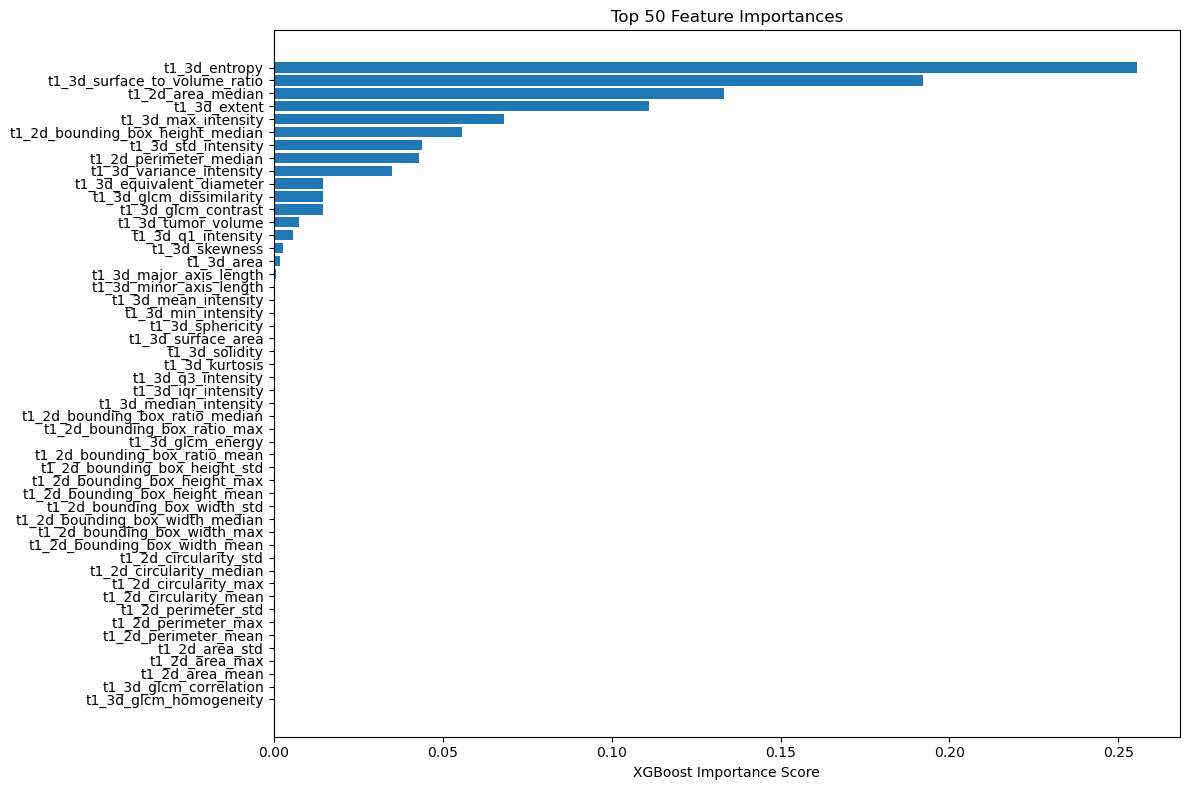

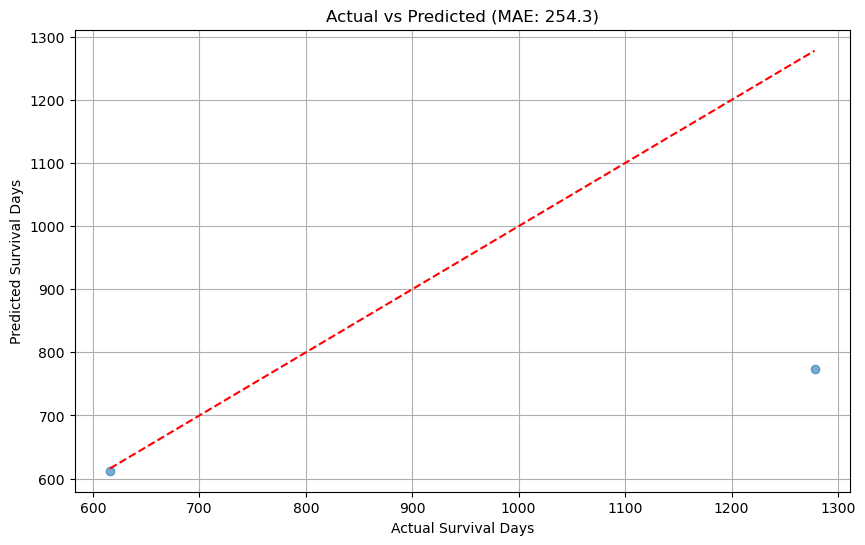

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel

# Assuming you already have X_train, X_val, y_train, y_val
# If not, uncomment and modify this:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Enhanced Feature Selection Pipeline
feature_selector = Pipeline([
    ('scaler', RobustScaler()),
    ('selector', SelectFromModel(
        XGBRegressor(random_state=42, n_estimators=100),
        threshold='median',
        max_features=50  # Keep top 50 features
    ))
])

X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_val_selected = feature_selector.transform(X_val)

# 2. Expanded Hyperparameter Grid
xgb_param_grid = {
    'n_estimators': [200, 300, 400],  # Increased range
    'learning_rate': [0.005, 0.01, 0.05],
    'max_depth': [3, 4, 5],           # More optimal depth range
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'reg_alpha': [0.1, 1, 10],       # Higher regularization
    'reg_lambda': [0.1, 1, 10],      # Higher regularization
    'gamma': [0, 0.1, 0.2]          # Added gamma parameter
}

# 3. Enhanced Model with Early Stopping
xgb_model = XGBRegressor(
    random_state=42,
    early_stopping_rounds=50,
    eval_metric='mae'
)

# 4. Optimized Grid Search
xgb_grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=3
)

# 5. Training with Validation Set
xgb_grid.fit(
    X_train_selected, y_train,
    eval_set=[(X_val_selected, y_val)],
    verbose=False
)

# 6. Results Analysis
print(f"Best Params: {xgb_grid.best_params_}")
print(f"Best CV MAE: {-xgb_grid.best_score_:.1f}")

best_xgb = xgb_grid.best_estimator_
val_pred = best_xgb.predict(X_val_selected)
final_mae = mean_absolute_error(y_val, val_pred)
print(f"Validation MAE: {final_mae:.1f}")

# 7. Feature Importance Visualization
feature_names = X_train.columns[feature_selector.named_steps['selector'].get_support()]
importances = best_xgb.feature_importances_

plt.figure(figsize=(12, 8))
sorted_idx = np.argsort(importances)
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.title('Top 50 Feature Importances')
plt.xlabel('XGBoost Importance Score')
plt.tight_layout()
plt.show()

# 8. Prediction Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_val, val_pred, alpha=0.6)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')
plt.xlabel('Actual Survival Days')
plt.ylabel('Predicted Survival Days')
plt.title(f'Actual vs Predicted (MAE: {final_mae:.1f})')
plt.grid(True)
plt.show()

In [44]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'random_state': 42
    }

    model = XGBRegressor(**params)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    return -score.mean()

# Start the Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Display the best found parameters and results
print("Best parameters:", study.best_params)
print("Best score (neg_mean_absolute_error):", study.best_value)


[I 2025-03-30 16:45:18,893] A new study created in memory with name: no-name-be371be3-7a57-464f-af53-c936e55950ae
[I 2025-03-30 16:45:22,604] Trial 0 finished with value: 237.28348693847656 and parameters: {'n_estimators': 384, 'learning_rate': 0.02824063882268312, 'max_depth': 4, 'subsample': 0.7718693539606304, 'colsample_bytree': 0.7578509052235592, 'reg_alpha': 7.4534039691248335, 'reg_lambda': 0.7626983468585424}. Best is trial 0 with value: 237.28348693847656.
[I 2025-03-30 16:45:25,659] Trial 1 finished with value: 264.23773193359375 and parameters: {'n_estimators': 304, 'learning_rate': 0.1373544902232816, 'max_depth': 4, 'subsample': 0.9066923571415189, 'colsample_bytree': 0.9638787443705233, 'reg_alpha': 0.20410392112363285, 'reg_lambda': 1.8741786718262021}. Best is trial 0 with value: 237.28348693847656.
[I 2025-03-30 16:45:29,659] Trial 2 finished with value: 206.13948669433594 and parameters: {'n_estimators': 433, 'learning_rate': 0.06784798648184018, 'max_depth': 6, 'sub

Best parameters: {'n_estimators': 176, 'learning_rate': 0.03420569416137485, 'max_depth': 10, 'subsample': 0.9724789538496376, 'colsample_bytree': 0.7337363245956706, 'reg_alpha': 4.59785966402, 'reg_lambda': 6.887804611681087}
Best score (neg_mean_absolute_error): 157.1511199951172


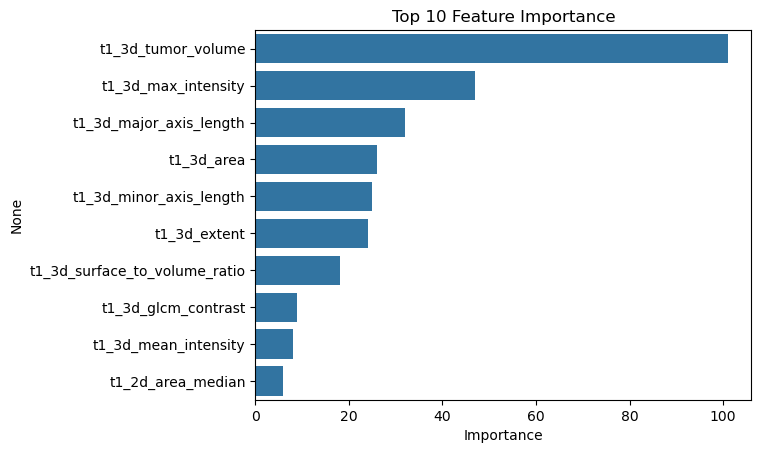

In [60]:
# Visualizing the top 10 most important features
top_features = importance_df.head(10)
sns.barplot(x='Importance', y=top_features.index, data=top_features)
plt.title("Top 10 Feature Importance")
plt.show()


In [48]:
!pip install imblearn


In [49]:
print(f"Dataset shape: {X_train.shape}")  # Verify actual sample size
# If sample size < 100, add:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

Dataset shape: (7, 652)


In [24]:
train_data.head()

patient_id  t1_3d_tumor_volume  t1_3d_area  \
0  BraTS20_Training_001               31172     31172.0   
1  BraTS20_Training_002               14104     14094.0   
2  BraTS20_Training_003               53360     53360.0   
3  BraTS20_Training_004               28565     28453.0   
4  BraTS20_Training_005               85371     85371.0   

   t1_3d_equivalent_diameter  \
0                  39.047091   
1                  29.969435   
2                  46.709555   
3                  37.877079   
4                  54.630761   

                                      t1_3d_centroid  t1_3d_major_axis_length  \
0  (72.34656101629668, 107.18295264981394, 17.979...                47.966161   
1  (150.15978430537817, 135.129132964382, 33.9462...                48.763803   
2  (106.66832833583209, 103.96791604197901, 30.70...                85.320887   
3  (86.70895863353601, 106.30893051699293, 7.9843...                57.906036   
4  (149.4783005938785, 104.2990359724028, 22.9928...               101.171756   

   t1_3d_minor_axis_length  t1_3d_solidity  t1_3d_extent  t1_3d_surface_area  \
0                36.322307        0.875520      0.489818         5194.183594   
1                16.429286        0.785794      0.410664         2878.999756   
2                24.303977        0.723192      0.316421         9585.527344   
3                27.010411        0.756910      0.263322         5670.168945   
4                39.315632        0.701654      0.388969        16716.373047   

   t1_3d_surface_to_volume_ratio  t1_3d_sphericity  t1_3d_mean_intensity  \
0                       0.166630          0.922168              3.759543   
1                       0.204126          0.980552              3.635145   
2                       0.179639          0.715065              4.343731   
3                       0.198501          0.796974              3.256491   
4                       0.195809          0.560896              3.290627   

   t1_3d_median_intensity  t1_3d_min_intensity  t1_3d_max_intensity  \
0                3.791410            -0.624729             8.671779   
1                3.445000             1.227826             6.425867   
2                3.174980            -0.351755             9.401768   
3                3.307761            -0.617026             8.060895   
4                3.427344             0.146580             4.912321   

   t1_3d_std_intensity  t1_3d_variance_intensity  t1_3d_skewness  \
0             1.098909                  1.207601        0.407400   
1             1.243524                  1.546352        0.299345   
2             2.567577                  6.592452        0.530094   
3             0.771637                  0.595423       -0.164304   
4             0.671769                  0.451274       -0.642588   

   t1_3d_kurtosis  t1_3d_q1_intensity  t1_3d_q3_intensity  \
0        0.565781            2.934369            4.446094   
1       -1.141707            2.533495            4.713717   
2       -1.292821            2.148293            6.835052   
3        1.040418            2.696362            3.820547   
4       -0.281898            2.866160            3.798588   

   t1_3d_iqr_intensity  t1_3d_entropy  t1_3d_glcm_contrast  \
0             1.511724       7.319163             1.457823   
1             2.180221      13.178911             1.104315   
2             4.686758       8.955211             1.630706   
3             1.124185       5.967501             0.985891   
4             0.932428       9.077906             1.085500   

   t1_3d_glcm_dissimilarity  t1_3d_glcm_homogeneity  t1_3d_glcm_energy  \
0                  0.781454                0.671795           0.058504   
1                  0.650386                0.716848           0.042390   
2                  0.641970                0.754580           0.051922   
3                  0.622025                0.723785           0.078748   
4                  0.694436                0.689936           0.055534   

   t1_3d_glcm_corre

In [69]:
import numpy as np

# BraTS survival data typically has no censoring (all patients have observed events)
# If censoring exists, you'd have a column like 'Status' (1=event, 0=censored)
y_train_surv = np.array(
    [(True, t) for t in y_train],  # (event, time)
    dtype=[('event', bool), ('time', float)]
)
y_val_surv = np.array(
    [(True, t) for t in y_val],
    dtype=[('event', bool), ('time', float)]
)

In [77]:
!pip install xgbse


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached wrapt-1.17.2-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 3.4 MB/s eta 0:00:38
   ---------------------------------------- 1.0/124.9 MB 3.4 MB/s eta 0:00:37
    --------------------------------------- 1.8/124.9 MB 3.0 MB/s eta 0:00:41
    --------------------------------------- 2.6/124.9 MB 3.2 MB/s eta 0:00:39
   - -------------------------------------- 3.4/124.9 MB 3.3 MB/s eta 0:00:37
   - -------------------------------------- 4.2/124.9 MB 3.4 MB/s eta 0:00:36
   - -------------------------------------- 5.0/124.9 MB 3.4 MB/s eta 0:00:36
   - -------------------------------------- 5.5/124.9 MB 3.4 MB/s eta 0:00:36
   -- ------------------------------------- 6.3/124.9 MB 3.4 MB/s eta 0:00:35
   -- ------------------------------------- 7.1/124.9

  You can safely remove it manually.


In [81]:
pip show xgbse


Name: xgbse
Version: 0.3.3
Summary: Improving XGBoost survival analysis with embeddings and debiased estimators
Home-page: https://github.com/loft-br/xgboost-survival-embeddings
Author: Loft Data Science Team
Author-email: bandits@loft.com.br
License: 
Location: c:\Users\MSI\OneDrive\Desktop\Modelisation fin\.conda\Lib\site-packages
Requires: joblib, lifelines, numpy, pandas, scikit-learn, xgboost
Required-by: 
Note: you may need to restart the kernel to use updated packages.
